# 연속데이터 예측 아이오와에임스 지역 집값예측하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./data/house_train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [11]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageQual        5.547945
GarageFinish      5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtCond          2.534247
BsmtQual          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Condition2        0.000000
BldgType          0.000000
Neighborhood      0.000000
LandSlope         0.000000
LotConfig         0.000000
Condition1        0.000000
LandContour       0.000000
LotShape          0.000000
Street            0.000000
LotArea           0.000000
MSSubClass        0.000000
MSZoning          0.000000
Id                0.000000
Utilities         0.000000
HouseStyle        0.000000
Foundation        0.000000
ExterQual         0.000000
ExterCond         0.000000
B

In [12]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [15]:
((data.isna().sum() / len(data) * 100).sort_values(ascending=False) > 0).index

Index(['LotFrontage', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'MasVnrArea', 'Electrical', 'LandSlope', 'LotConfig',
       'LotShape', 'Street', 'LotArea', 'MSZoning', 'Id', 'MSSubClass',
       'Utilities', 'LandContour', 'YearBuilt', 'YearRemodAdd', 'Condition2',
       'Neighborhood', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st',
       'RoofStyle', 'RoofMatl', 'BsmtFinSF1', 'Foundation', 'BsmtFinSF2',
       'BsmtUnfSF', 'Heating', 'Condition1', 'HouseStyle', 'OverallQual',
       'OverallCond', 'BldgType', '2ndFlrSF', '1stFlrSF', 'CentralAir',
       'HeatingQC', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'LowQualFinSF',
       'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'Functional', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
       'TotRmsAbvGrd', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [16]:
na_cols = ['LotFrontage', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'MasVnrArea', 'Electrical']

In [21]:
for col in na_cols:
#     print(data[col].dtype)
    if data[col].dtype == 'float64':
#         print(data[col].dtype, col)
        data[col] = data[col].fillna(data[col].median())
    else:
        data[col] = data[col].fillna(data[col].mode()[0])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
X = data.drop(["Id", "SalePrice"], axis=1)
y = data['SalePrice']

In [25]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal


In [26]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [27]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [28]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

<Axes: >

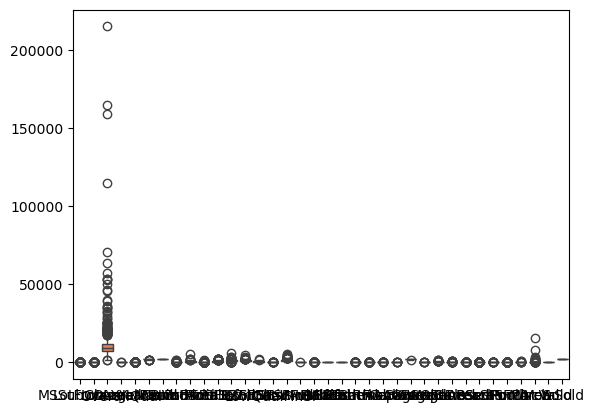

In [34]:
sns.boxplot(data[num_cols])

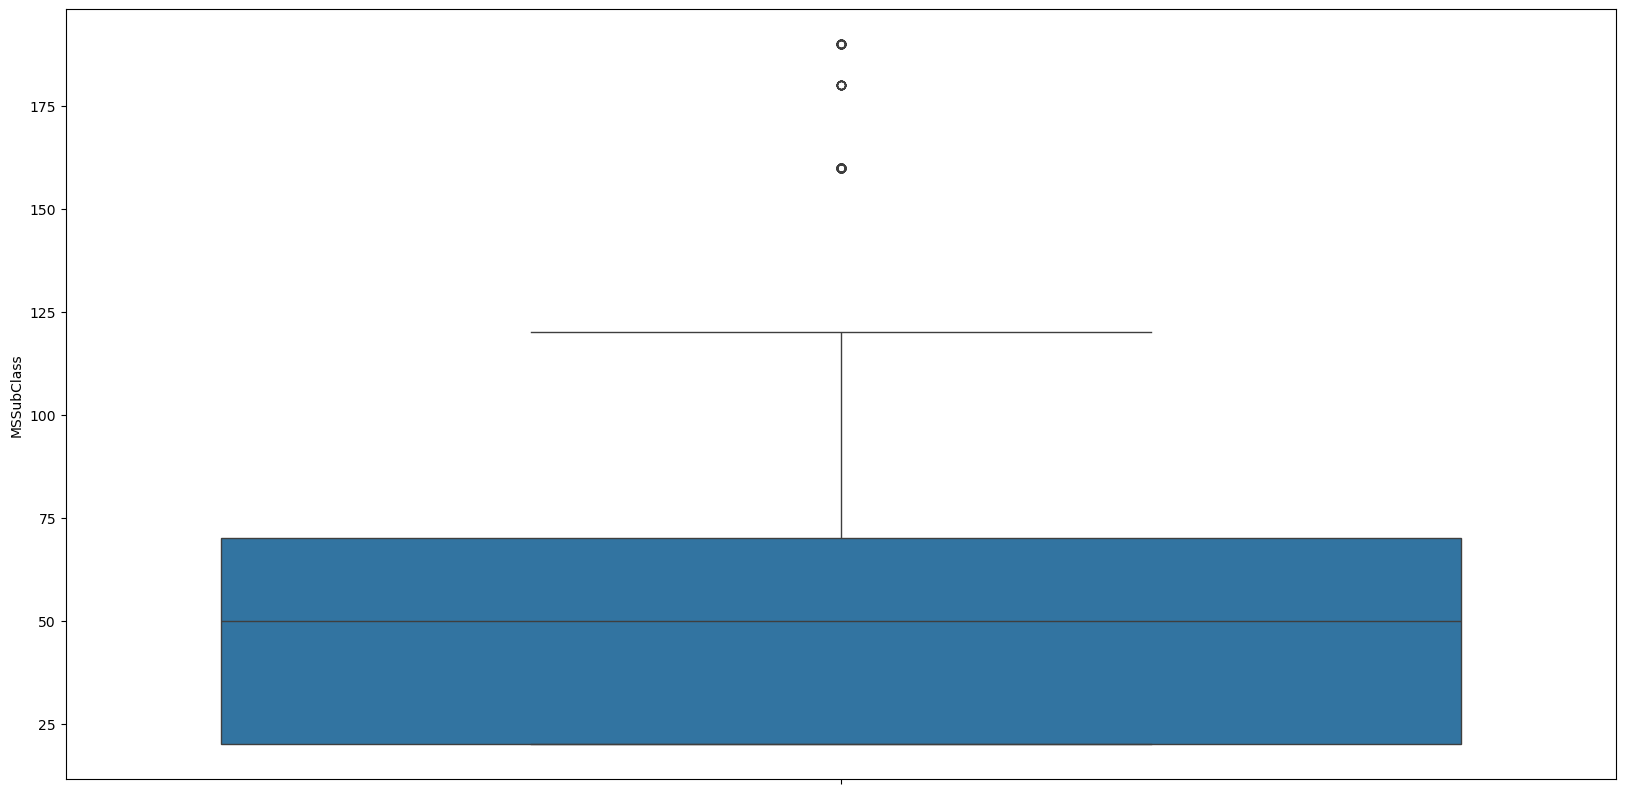

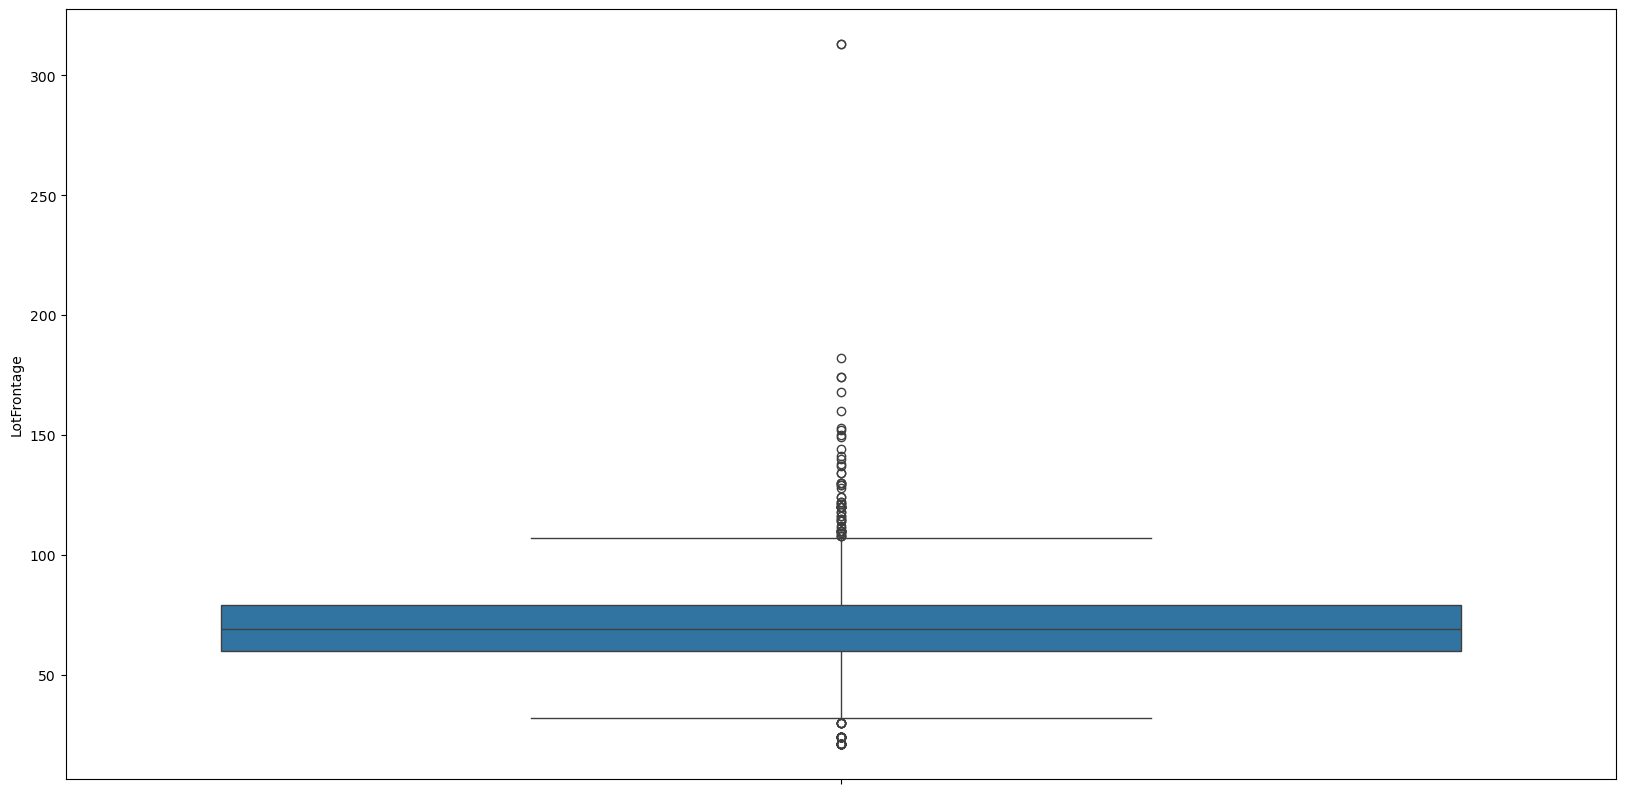

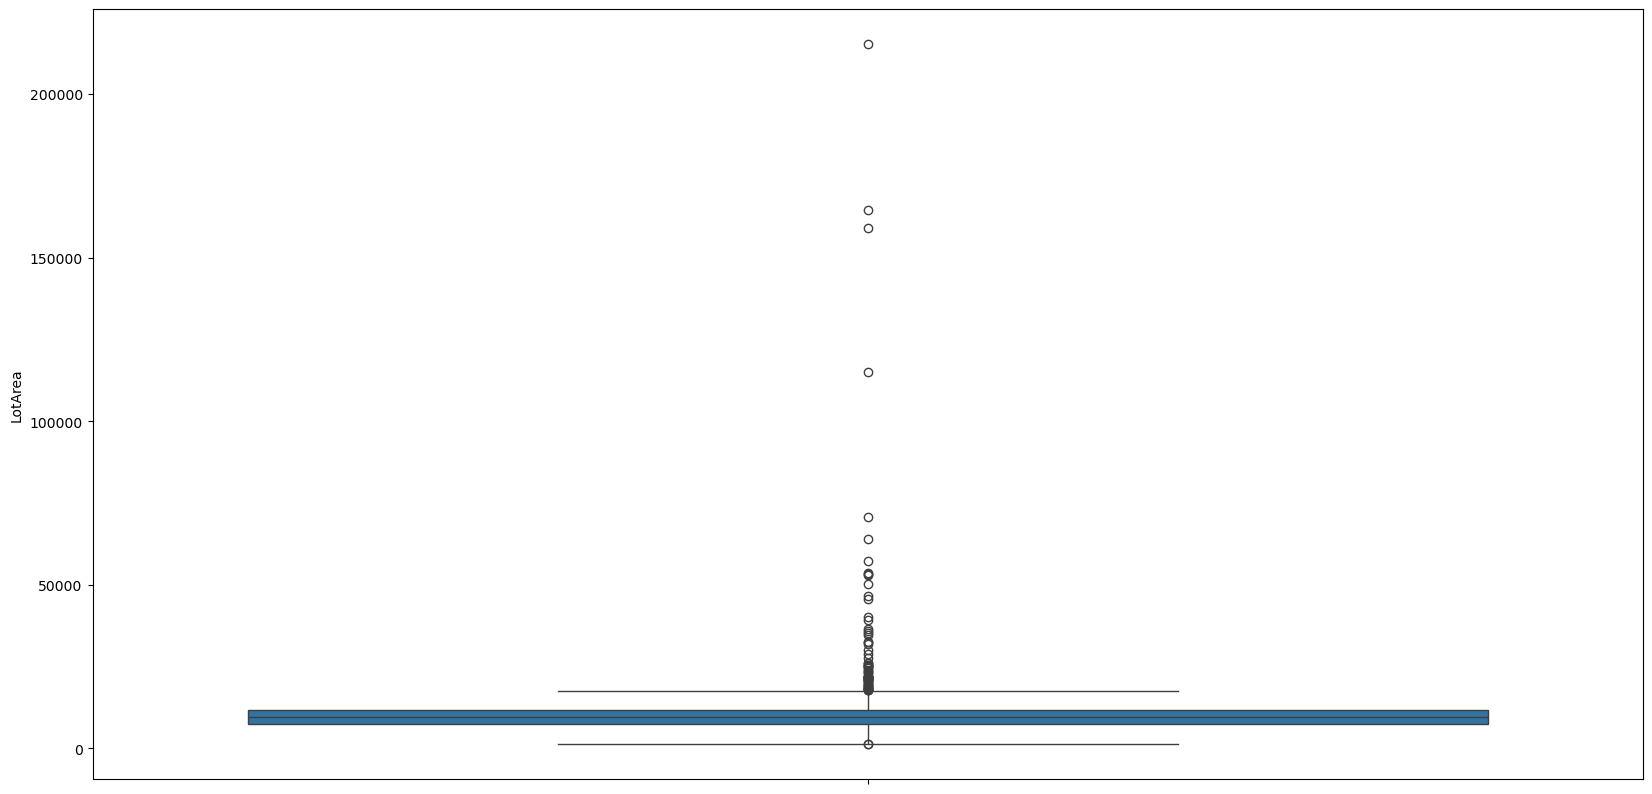

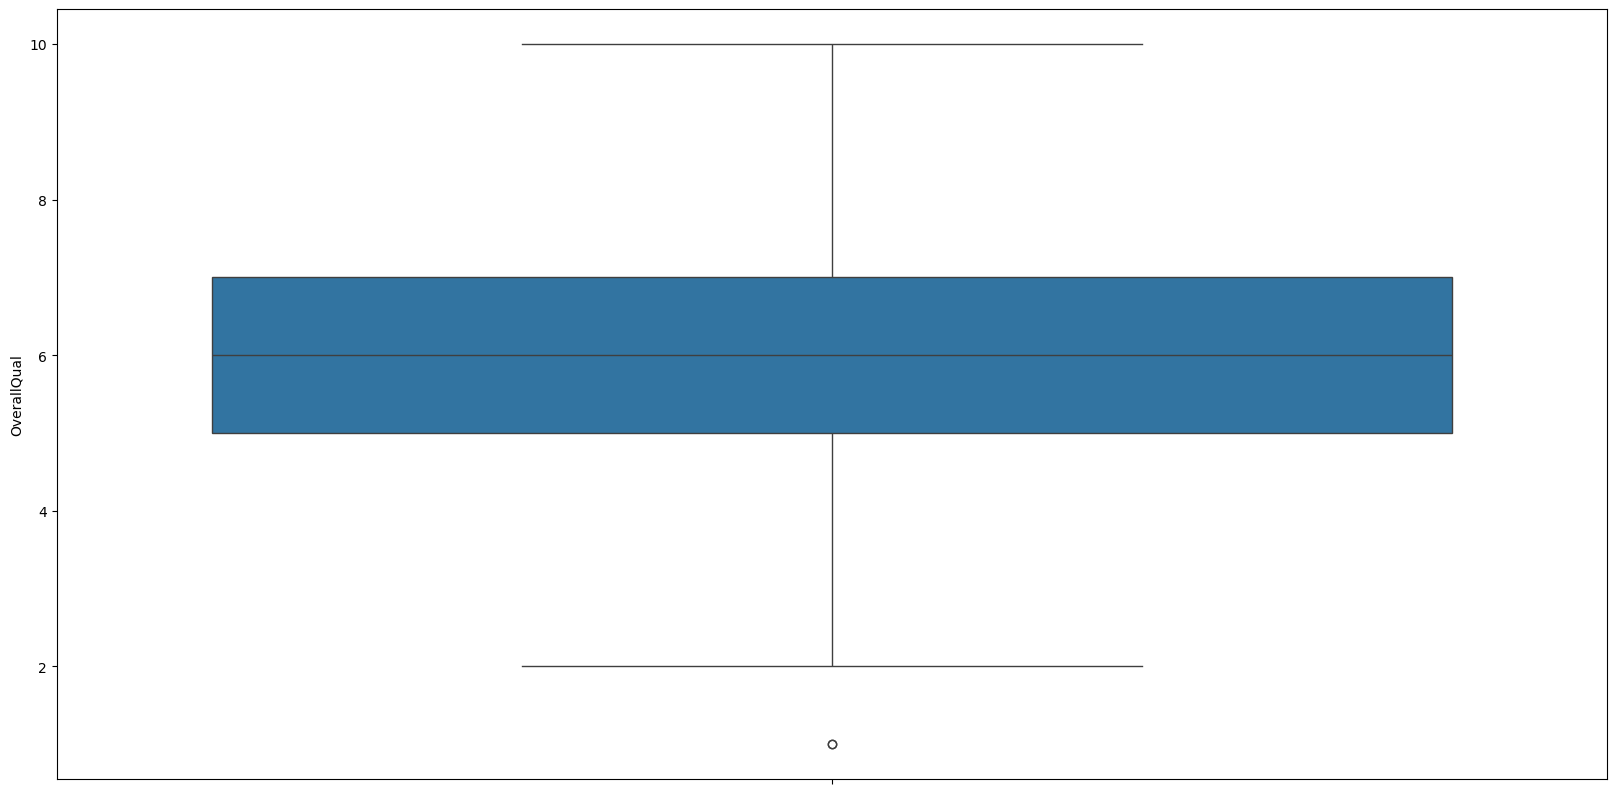

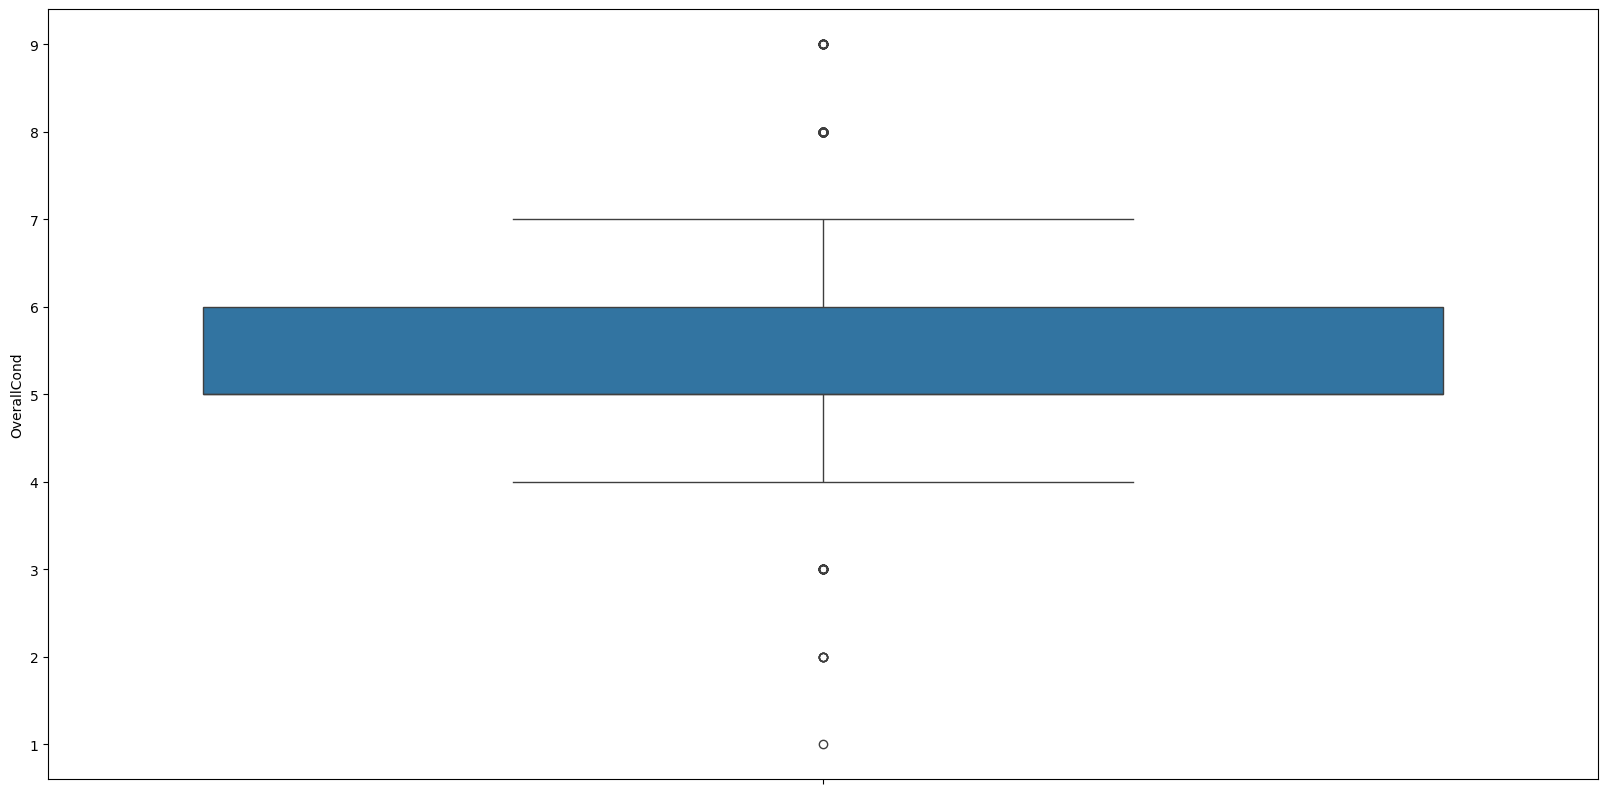

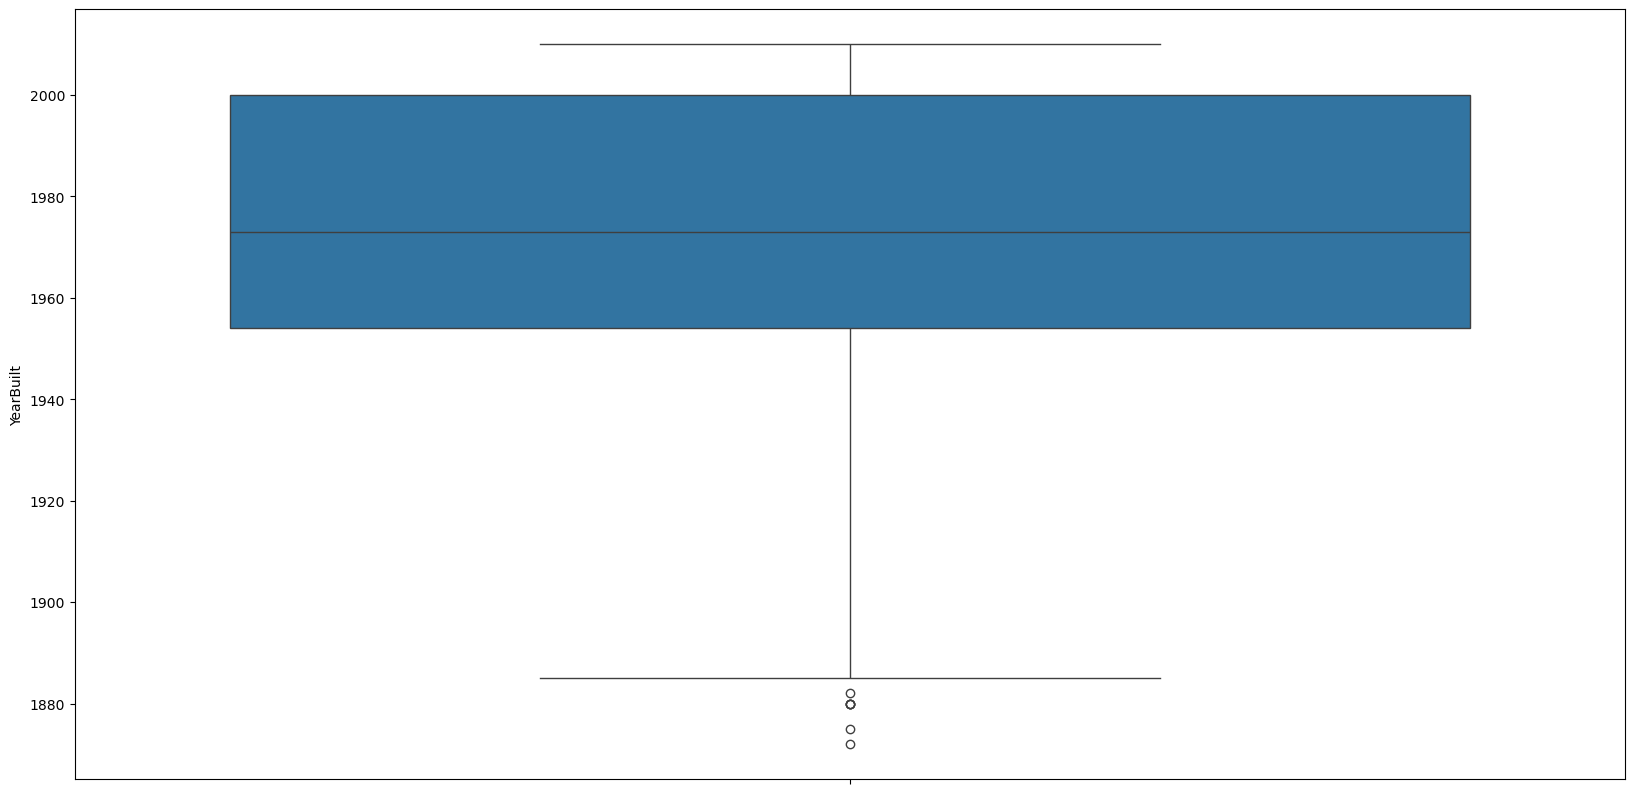

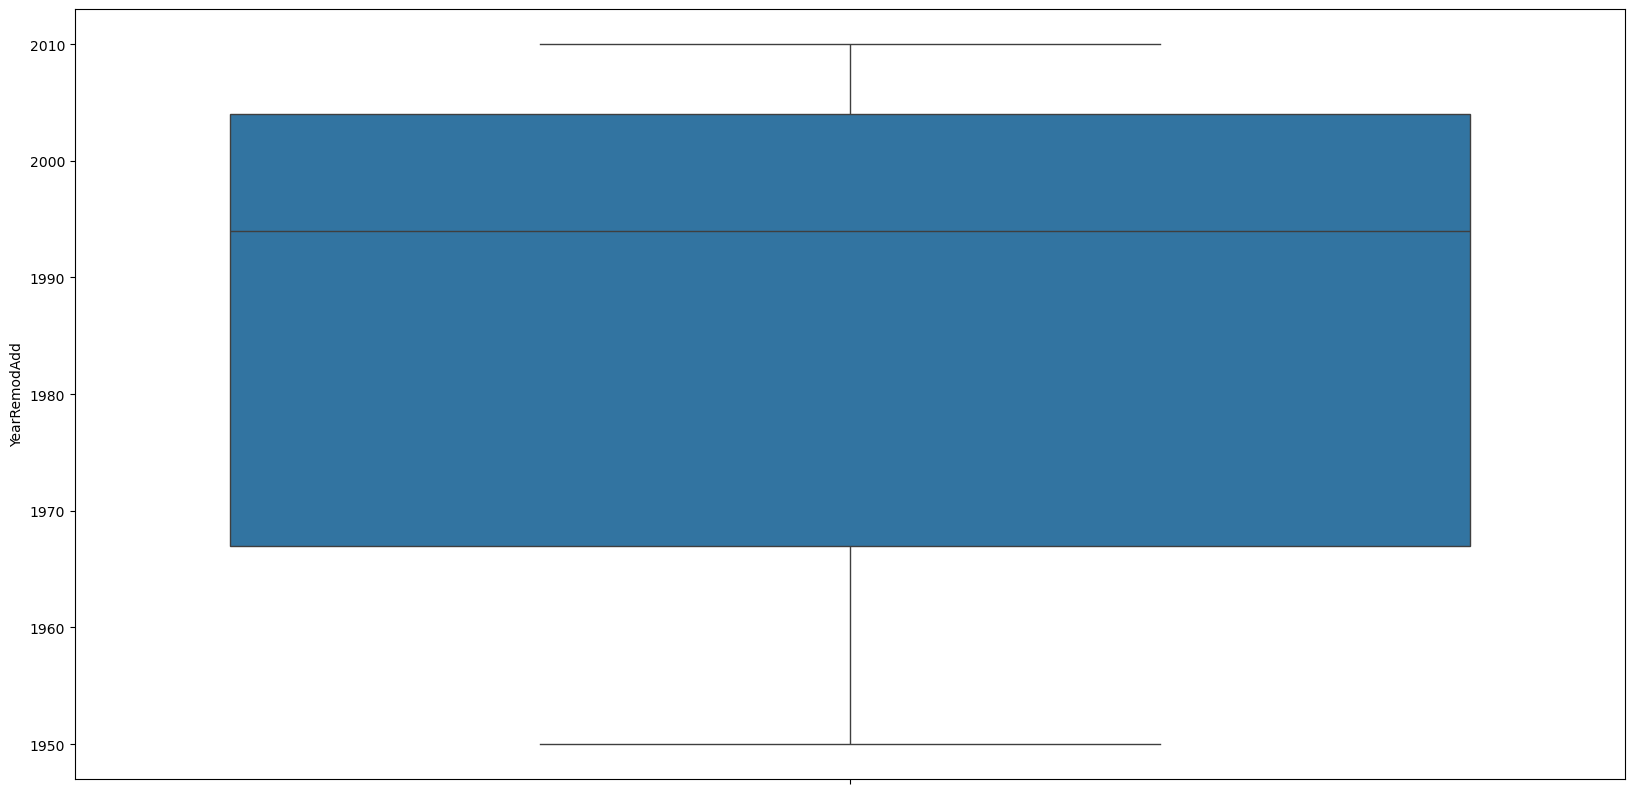

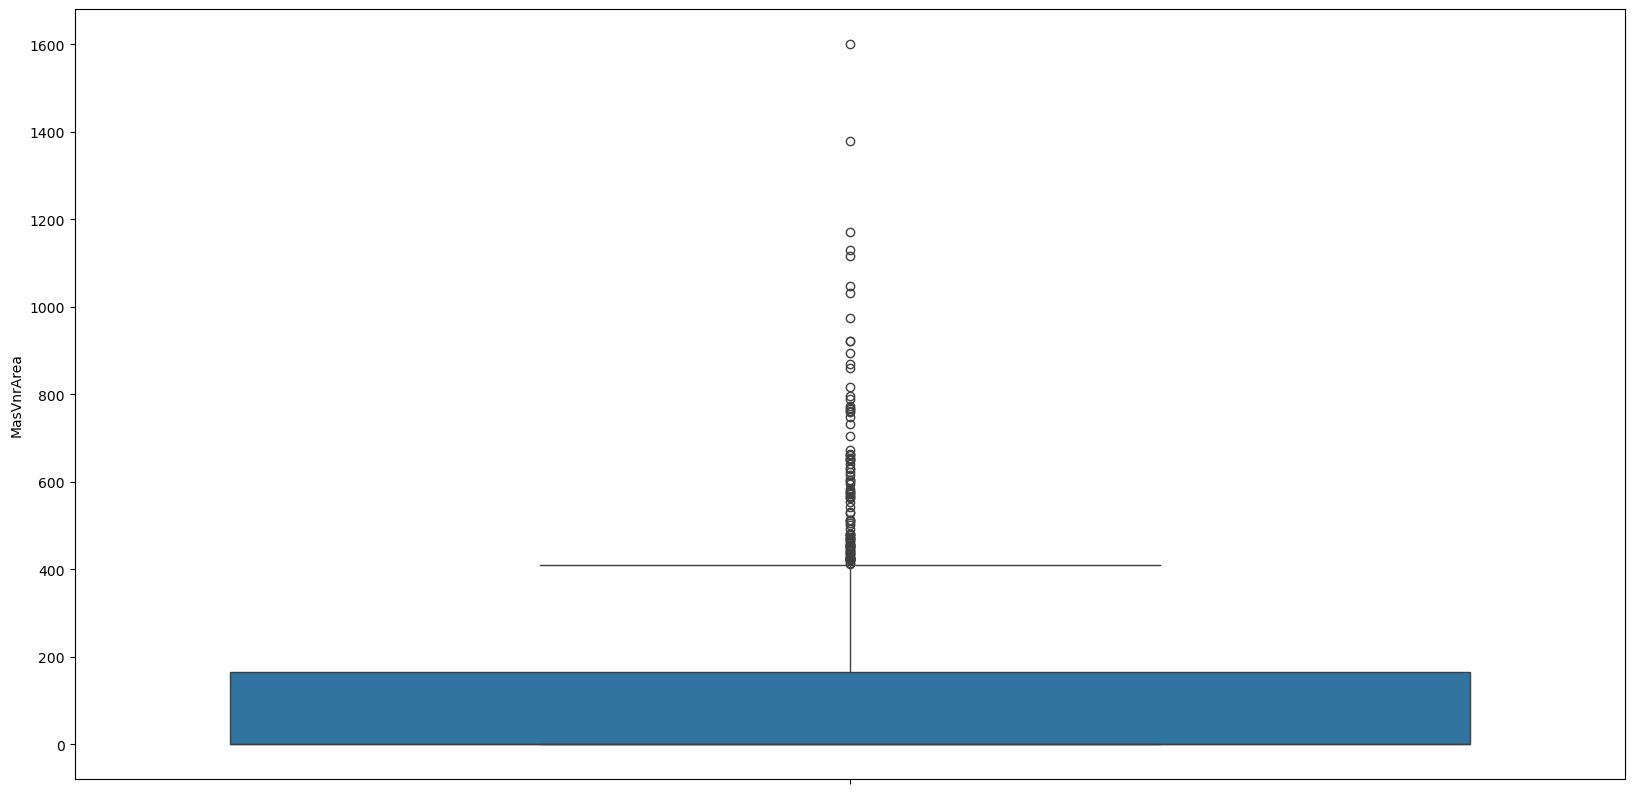

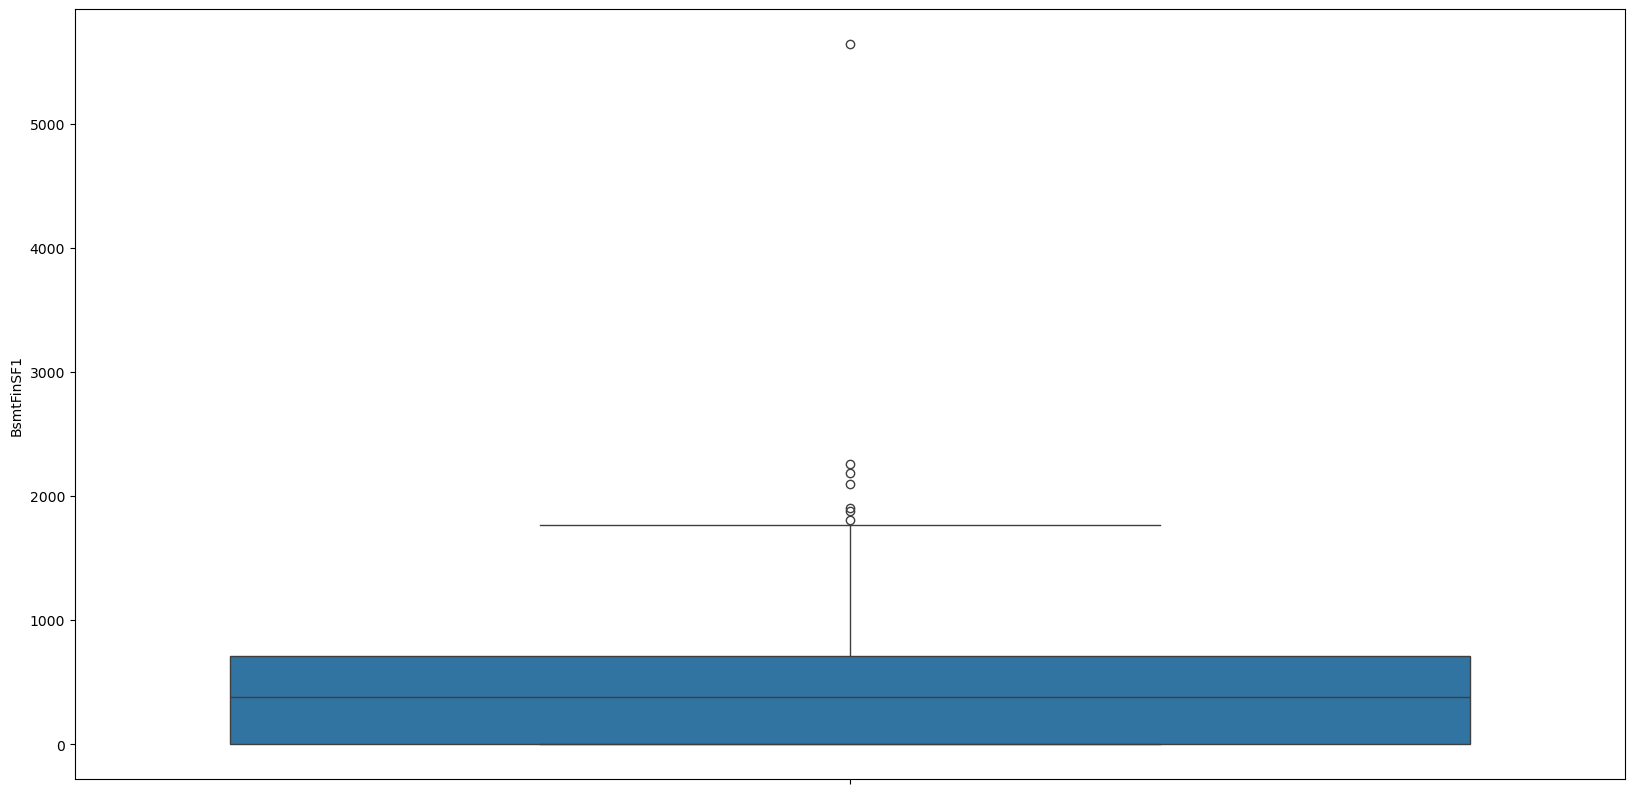

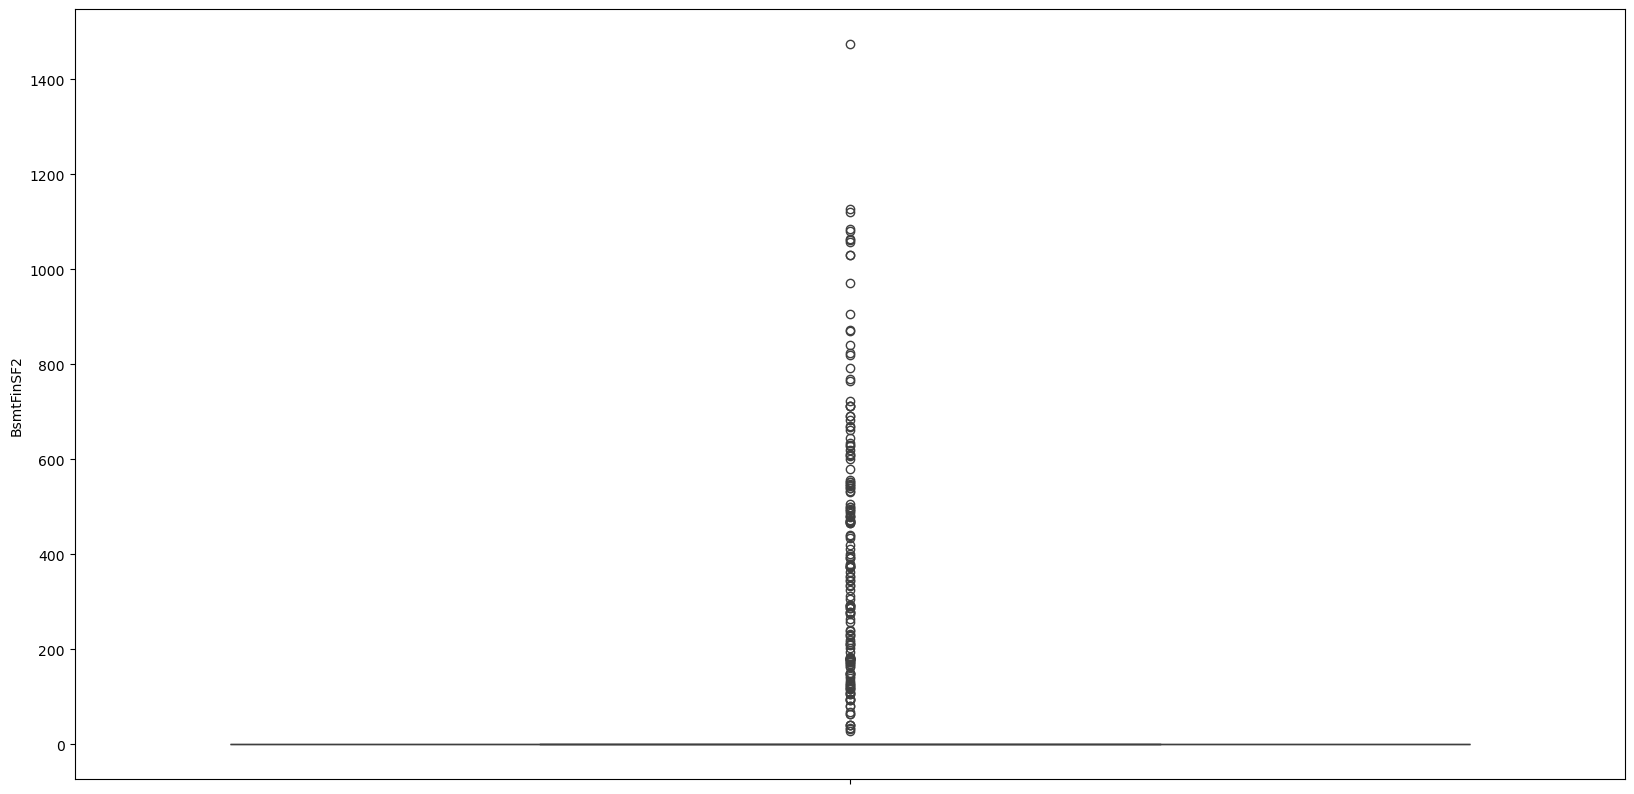

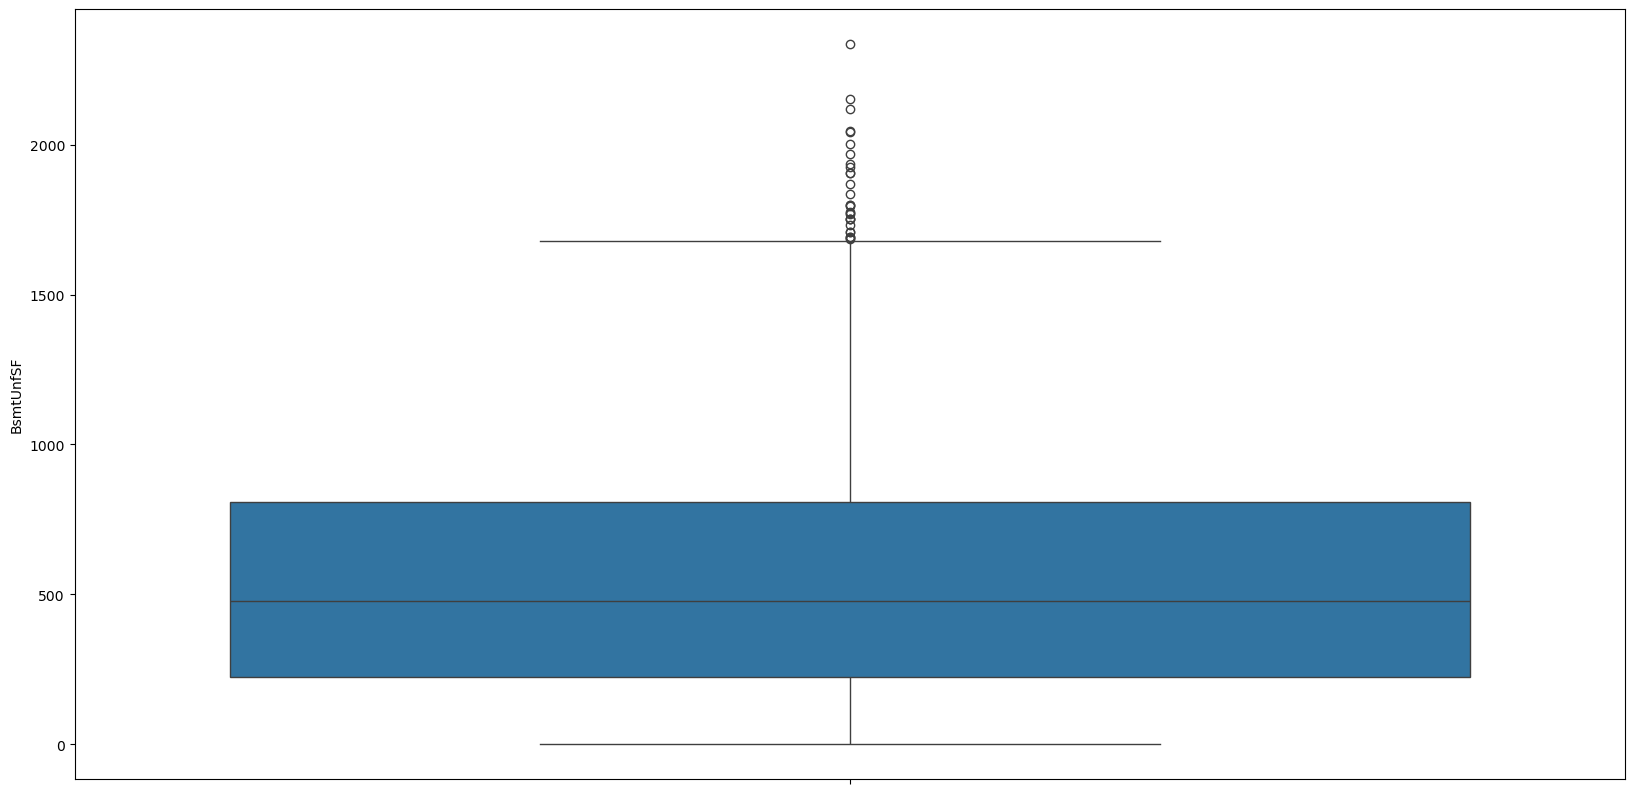

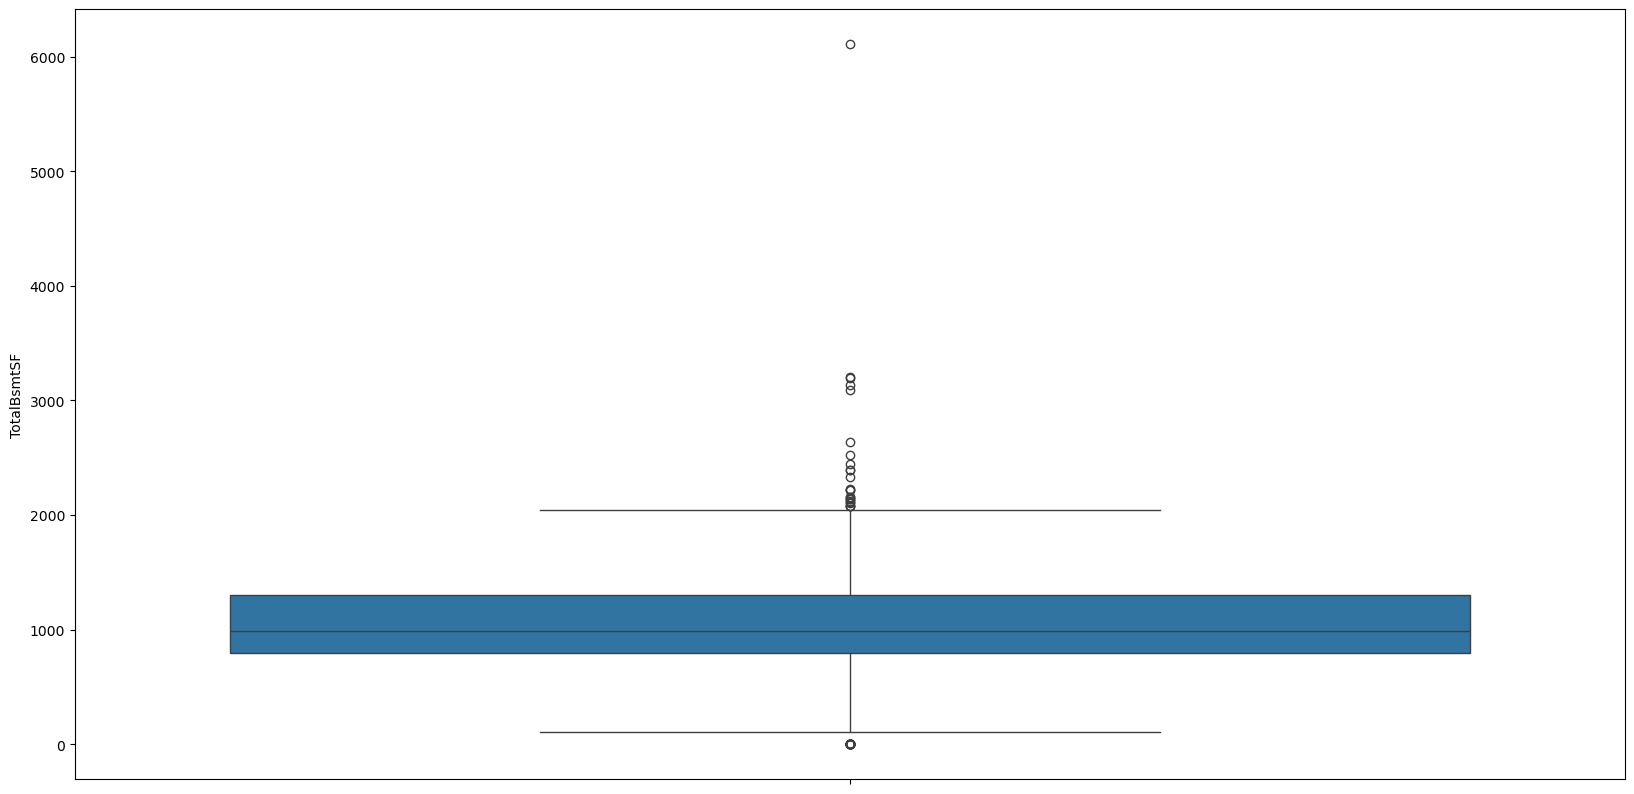

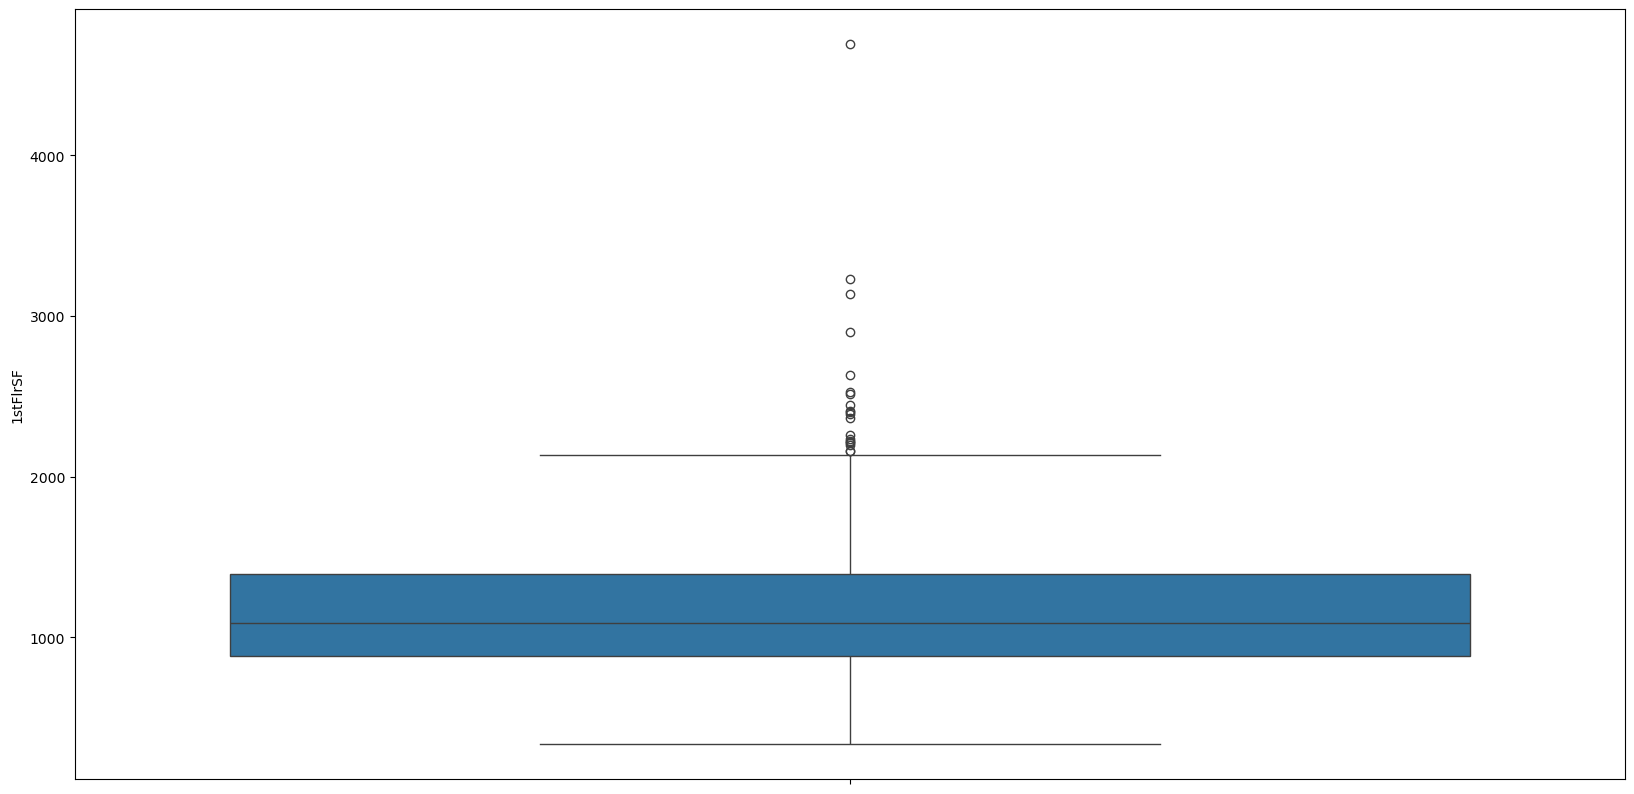

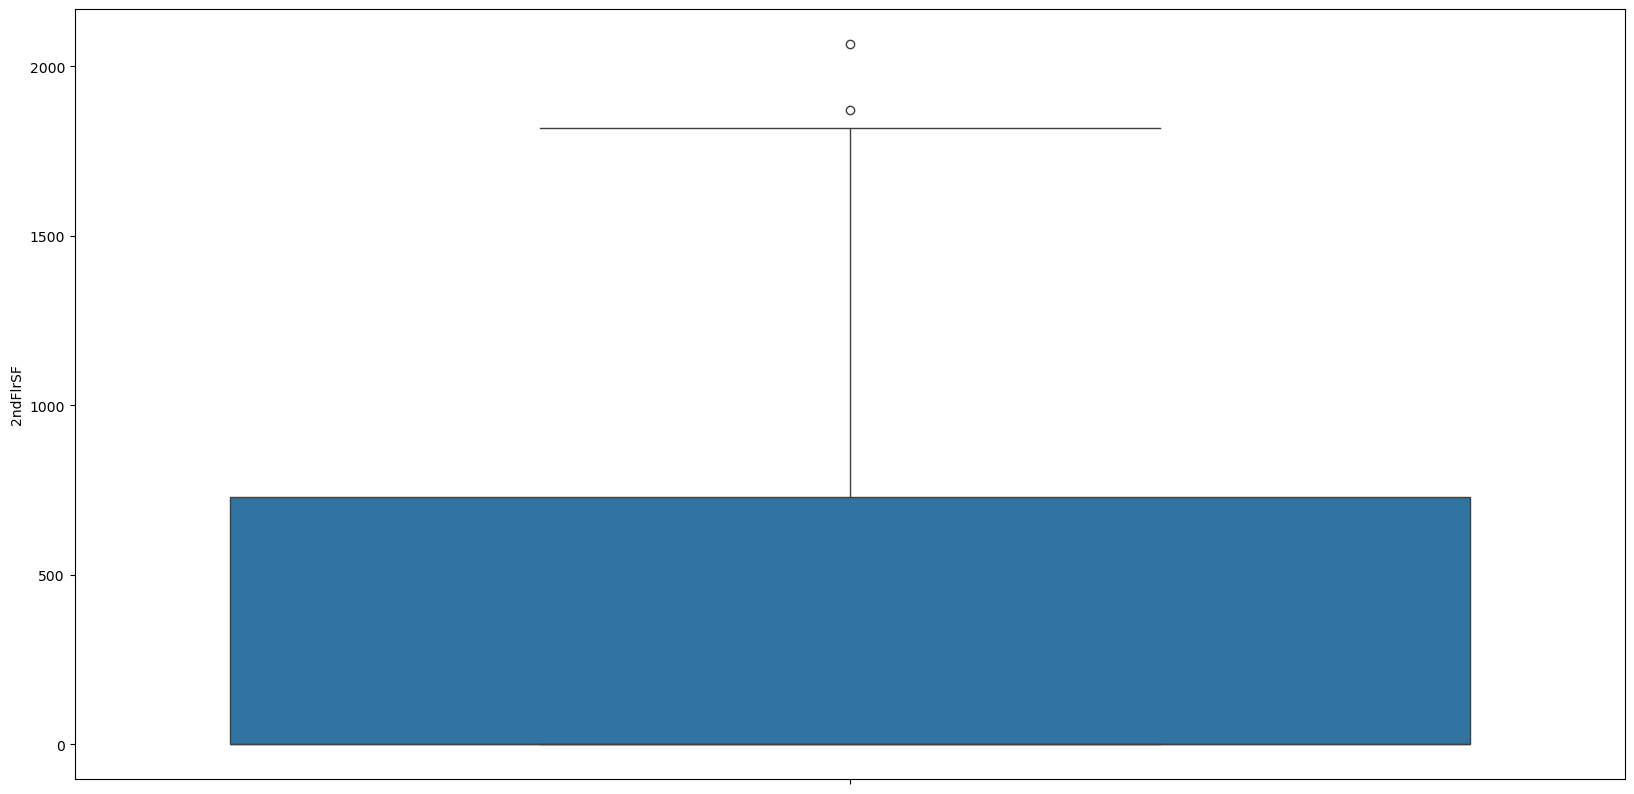

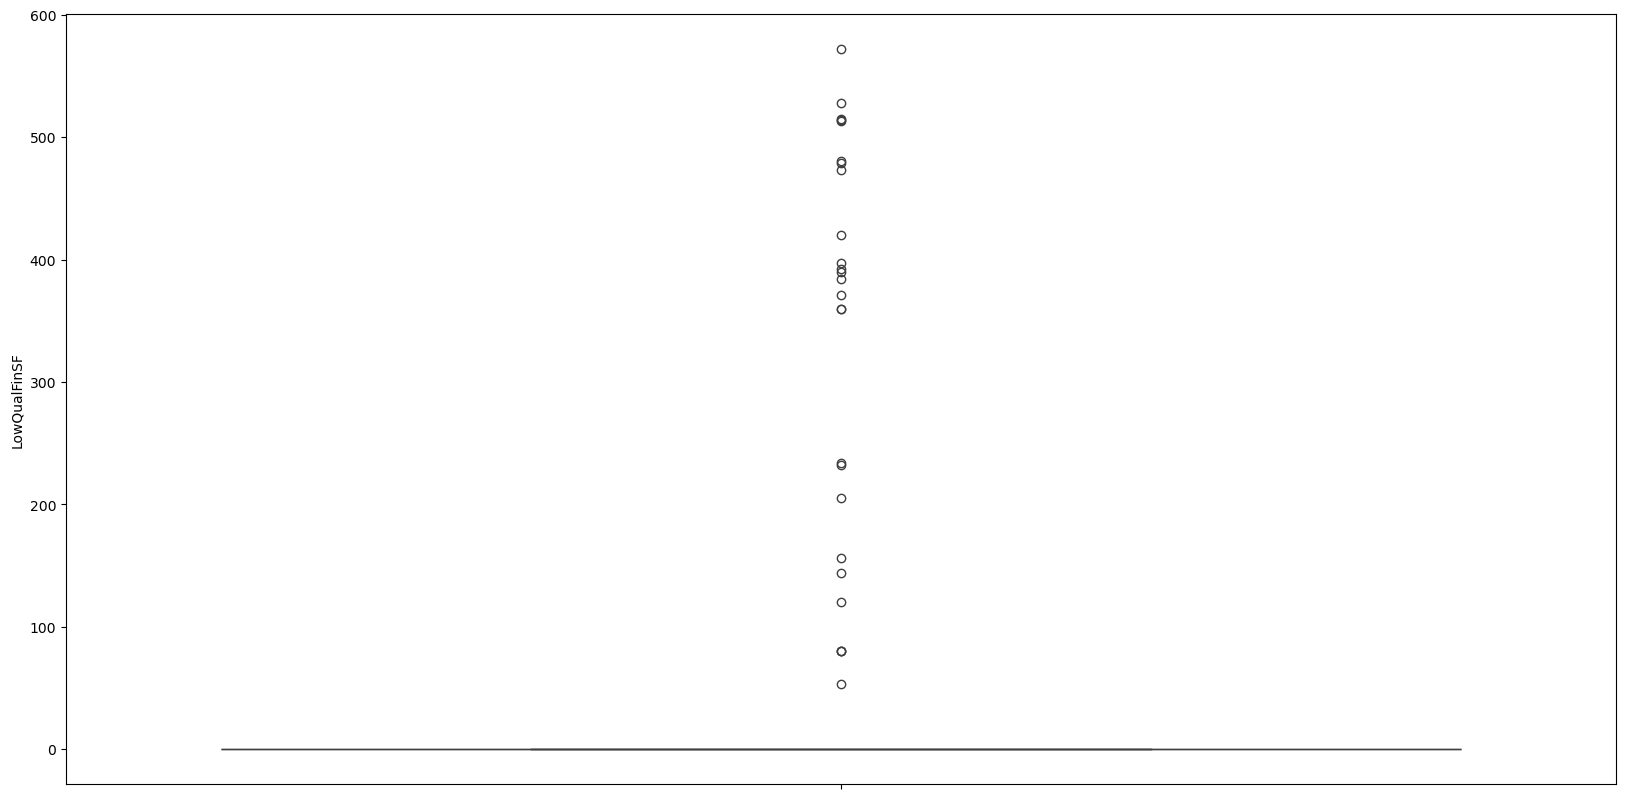

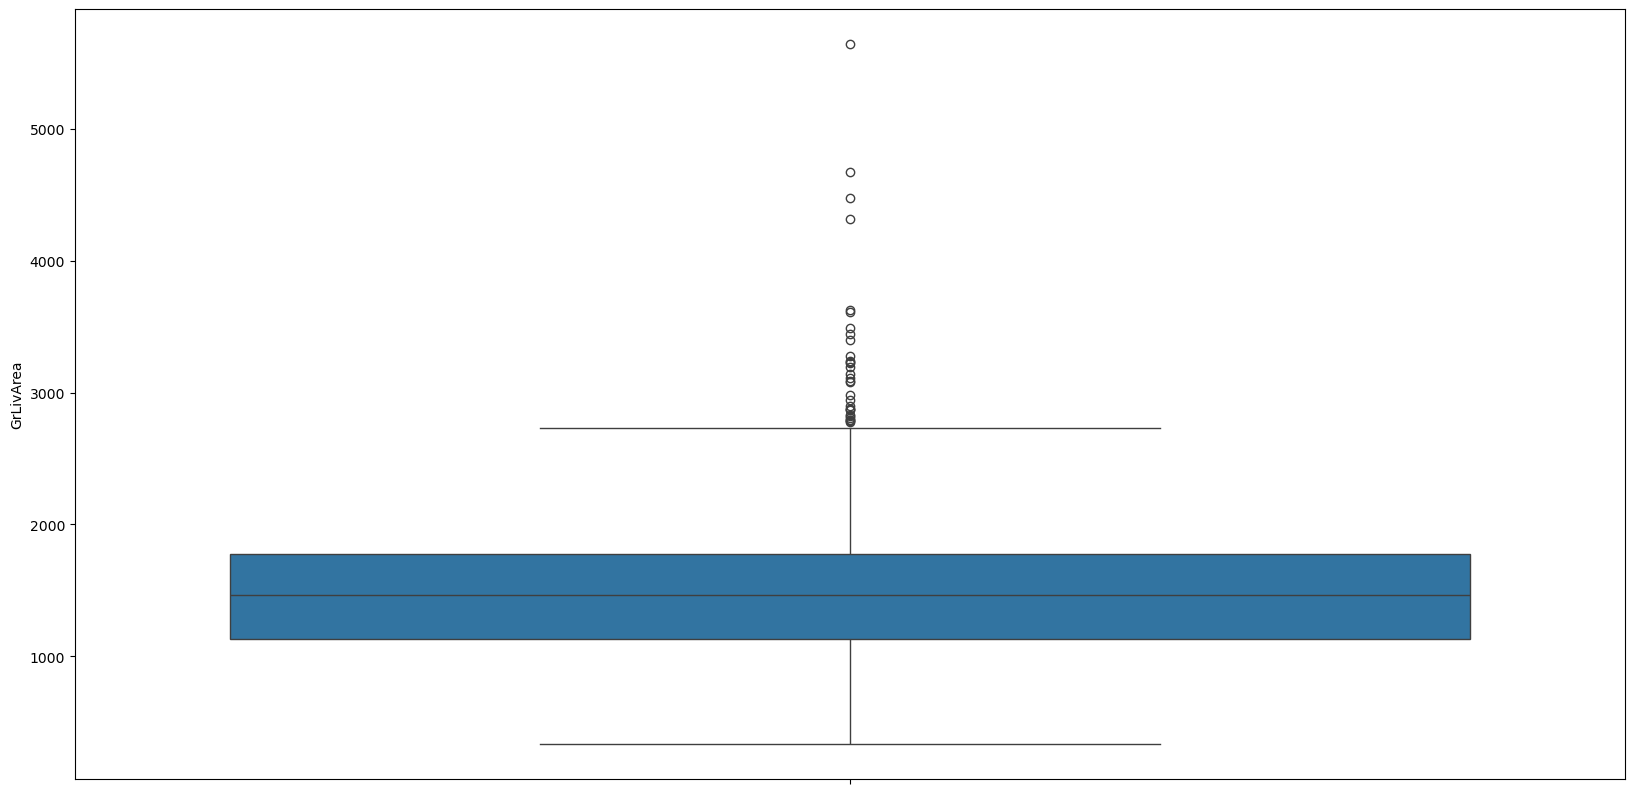

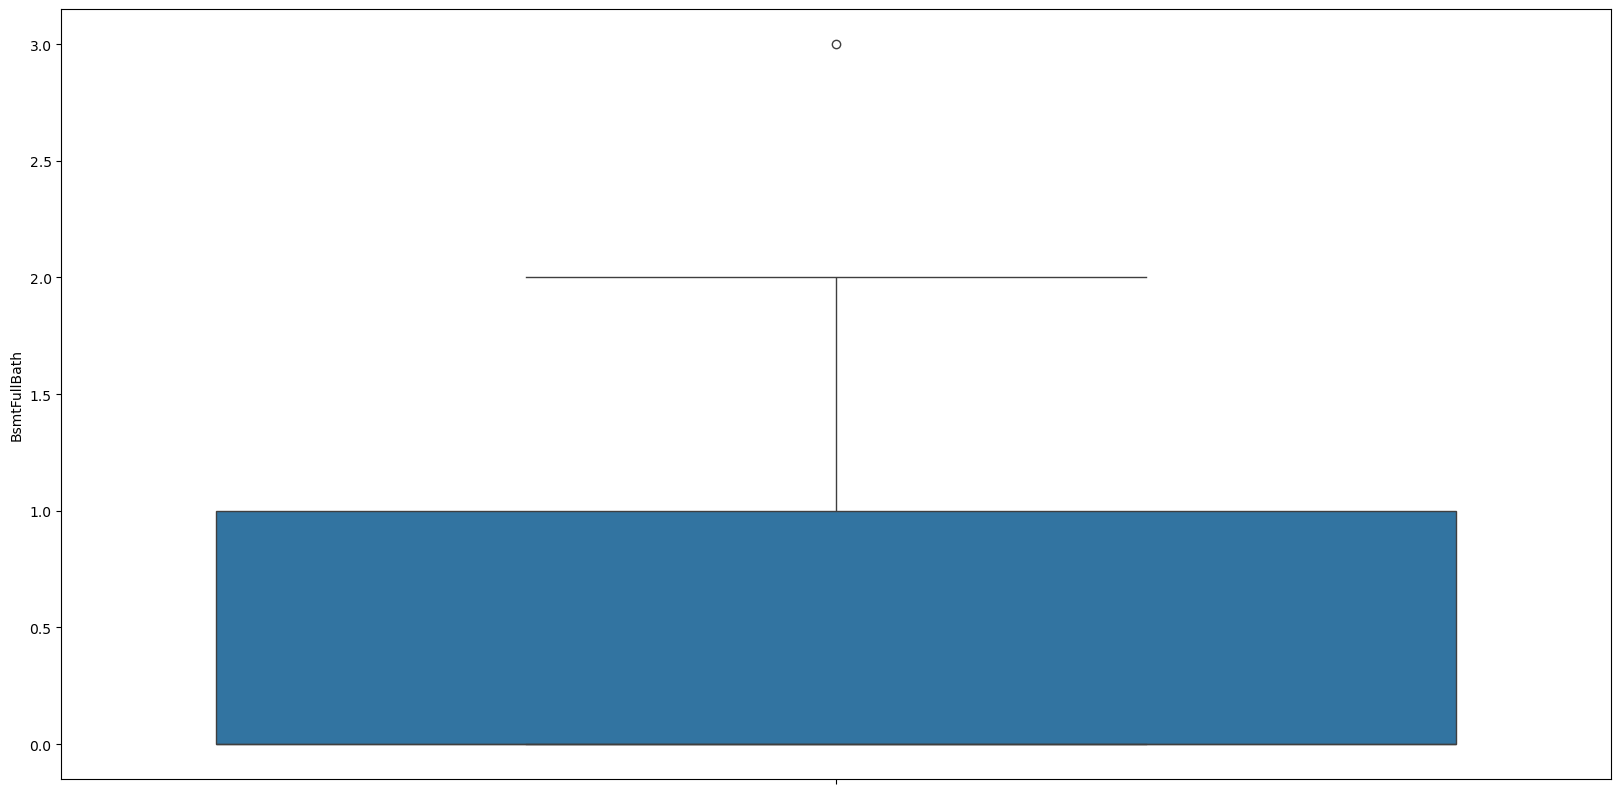

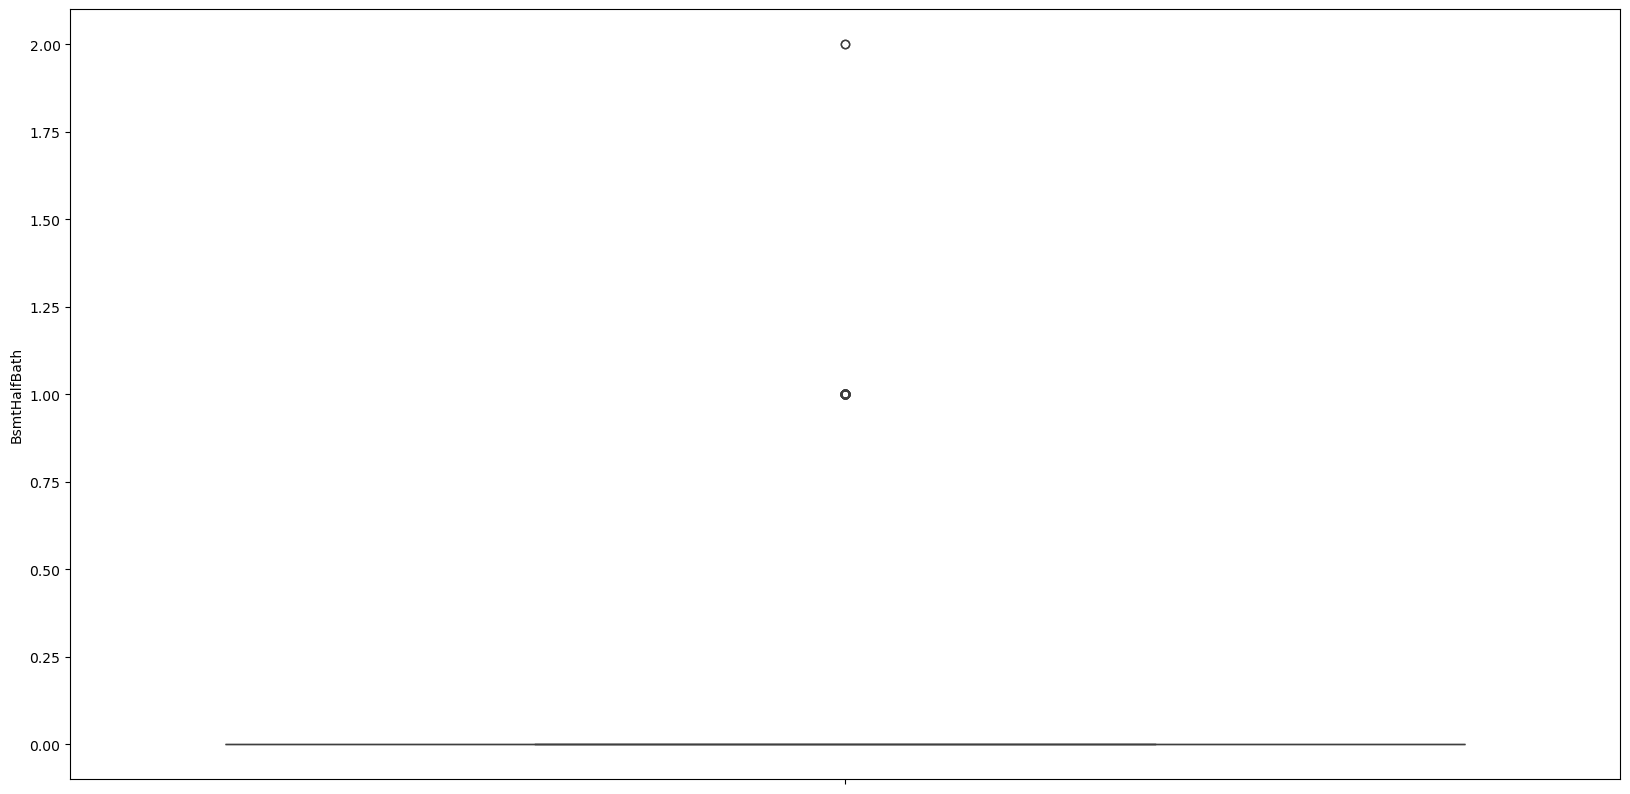

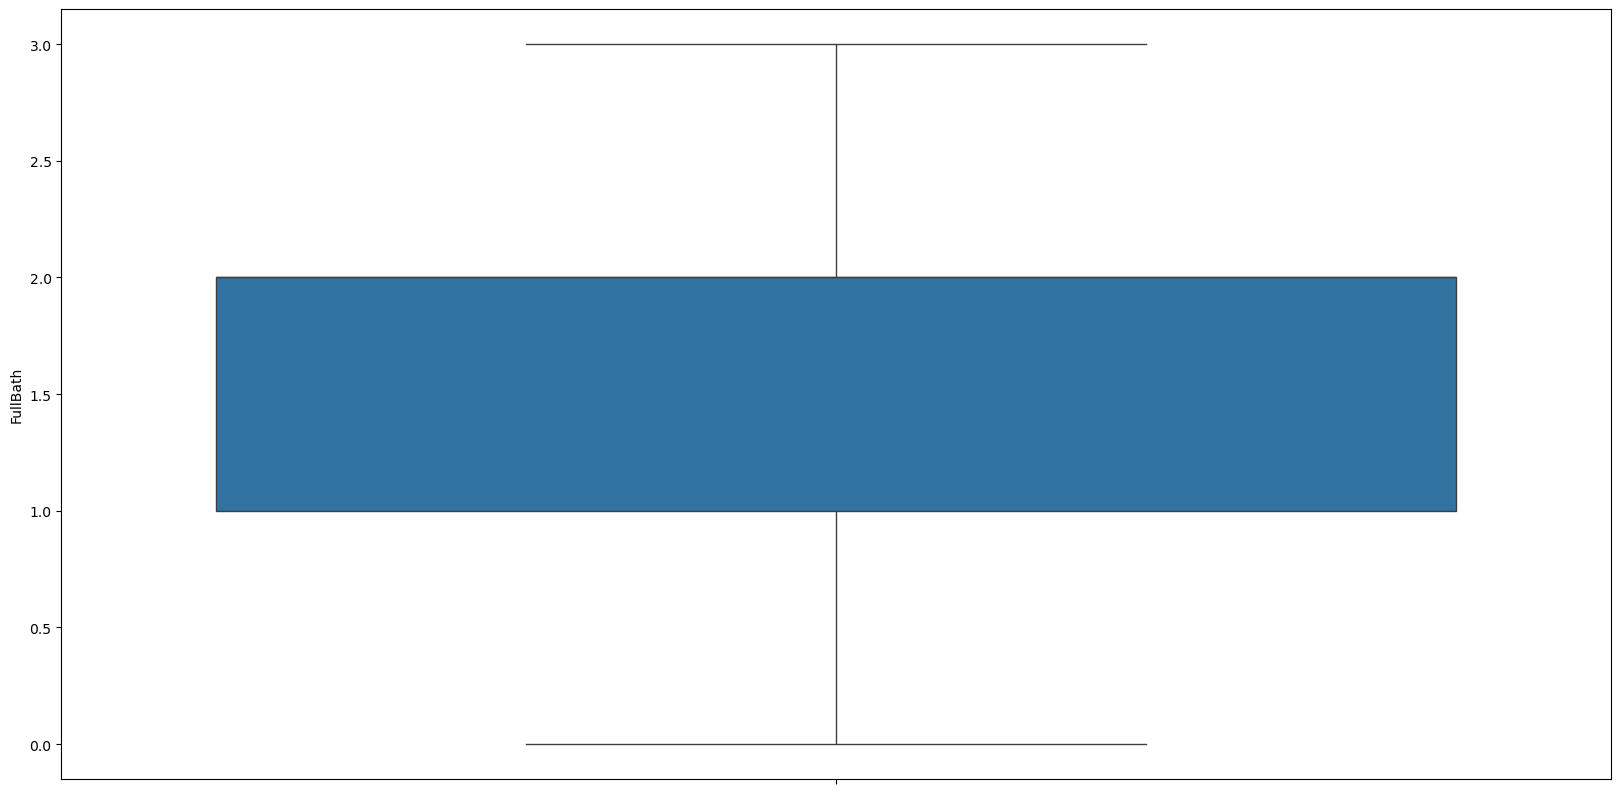

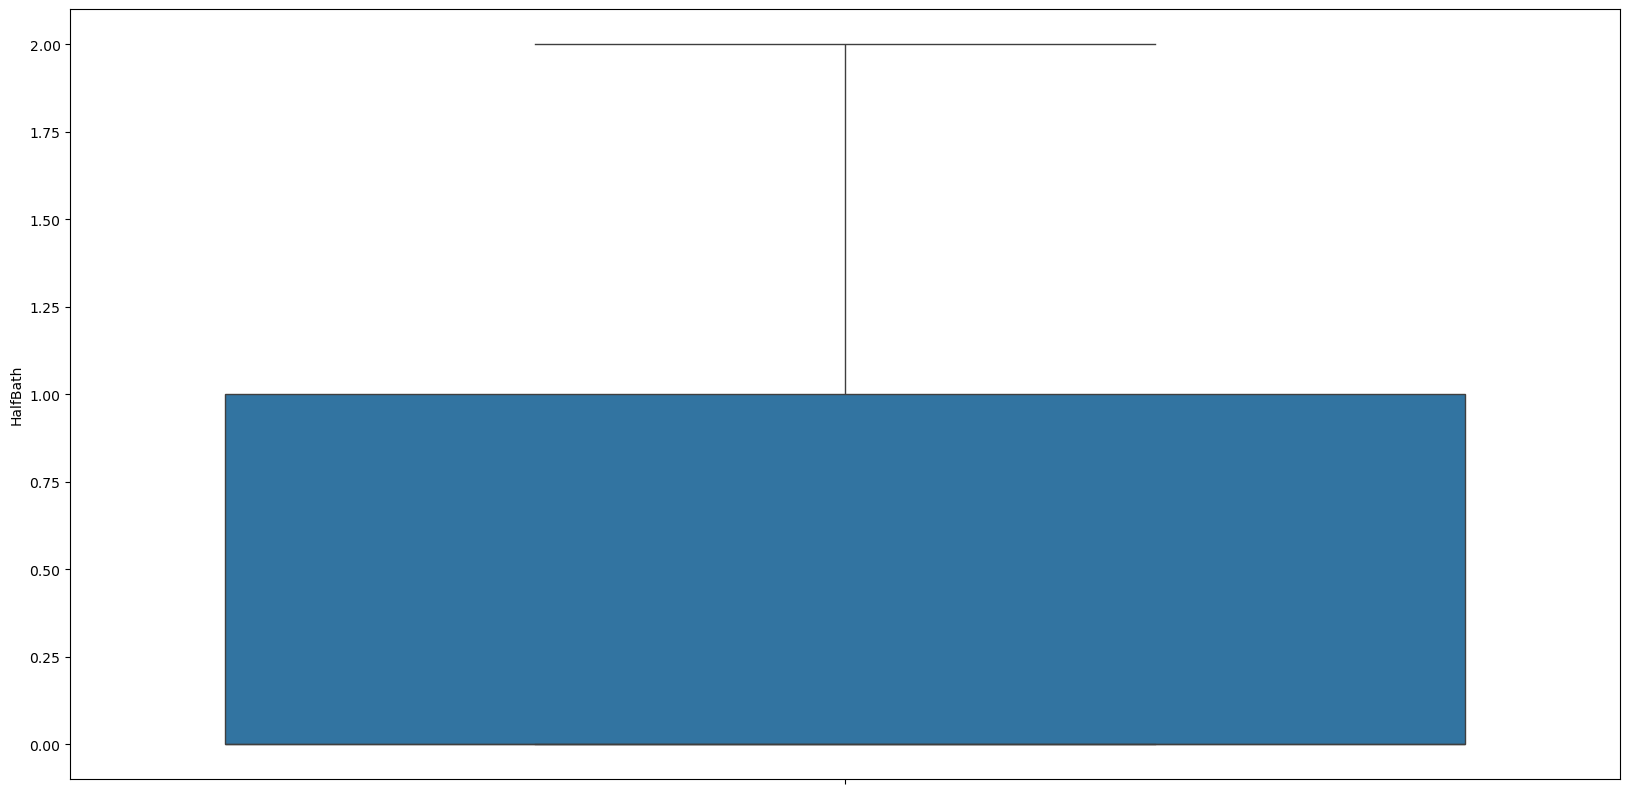

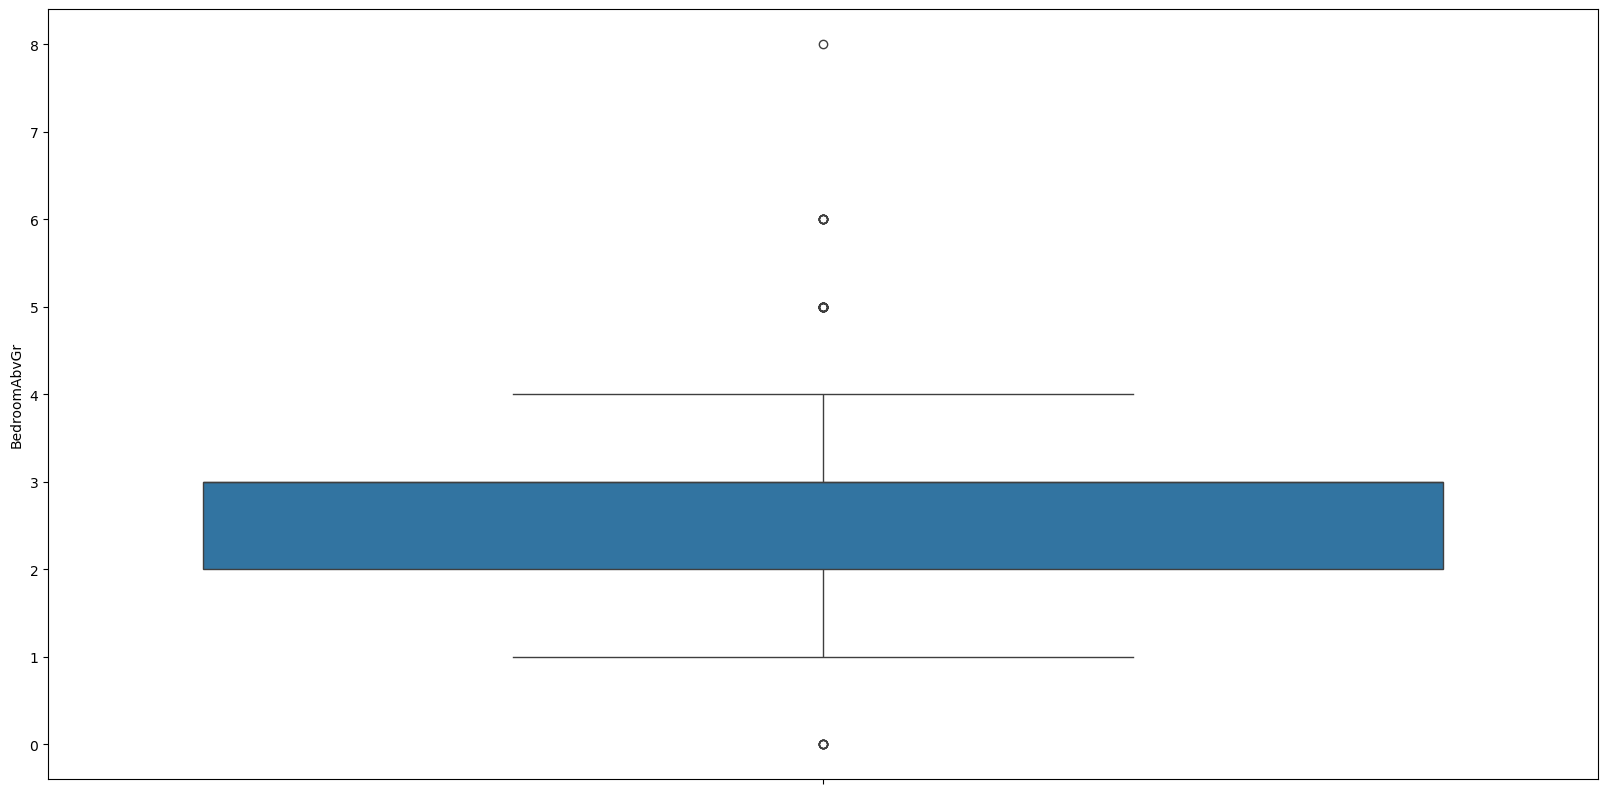

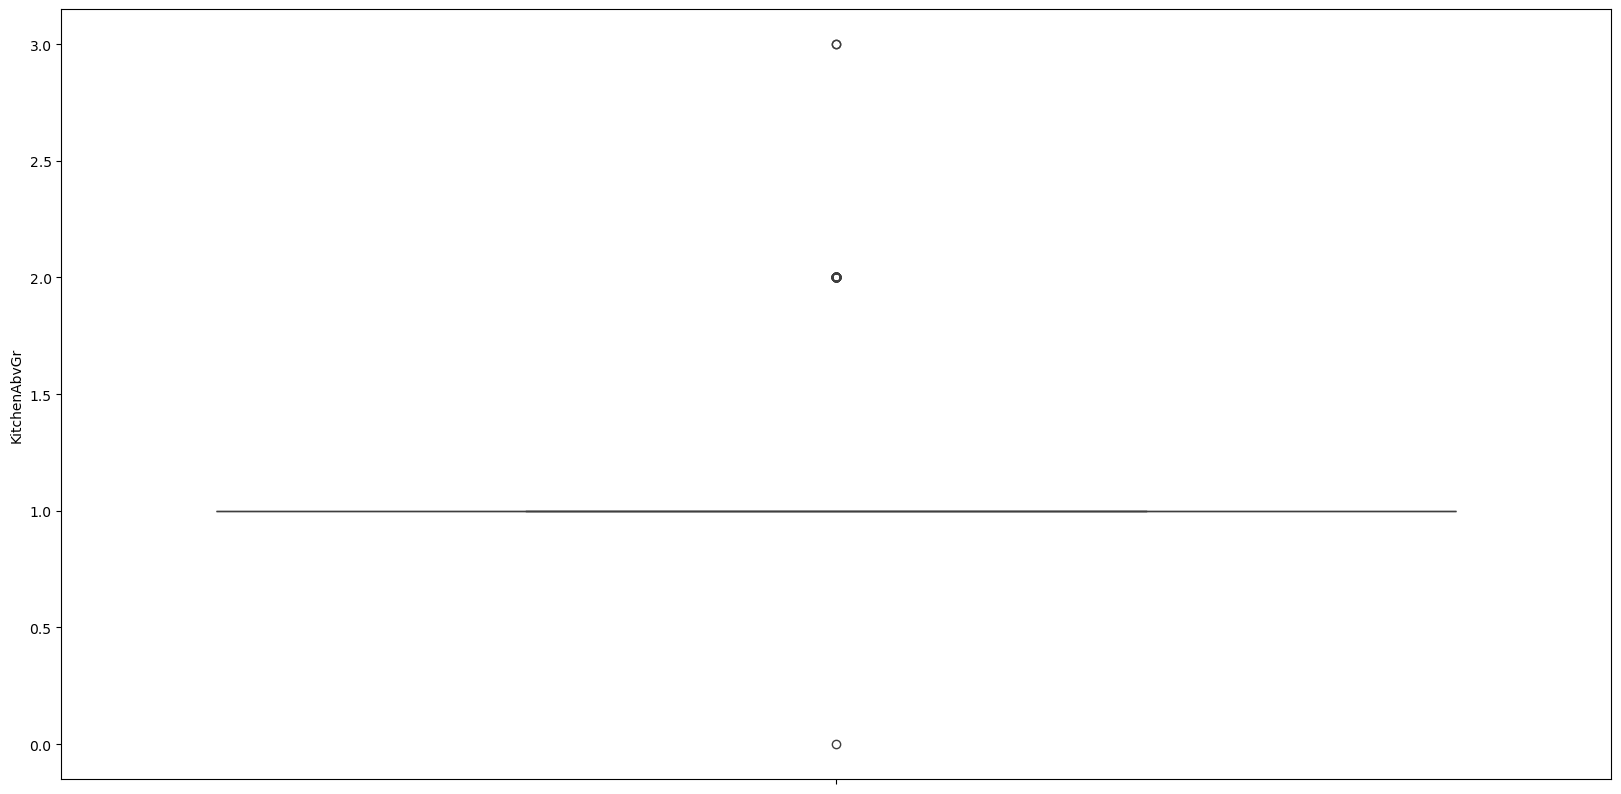

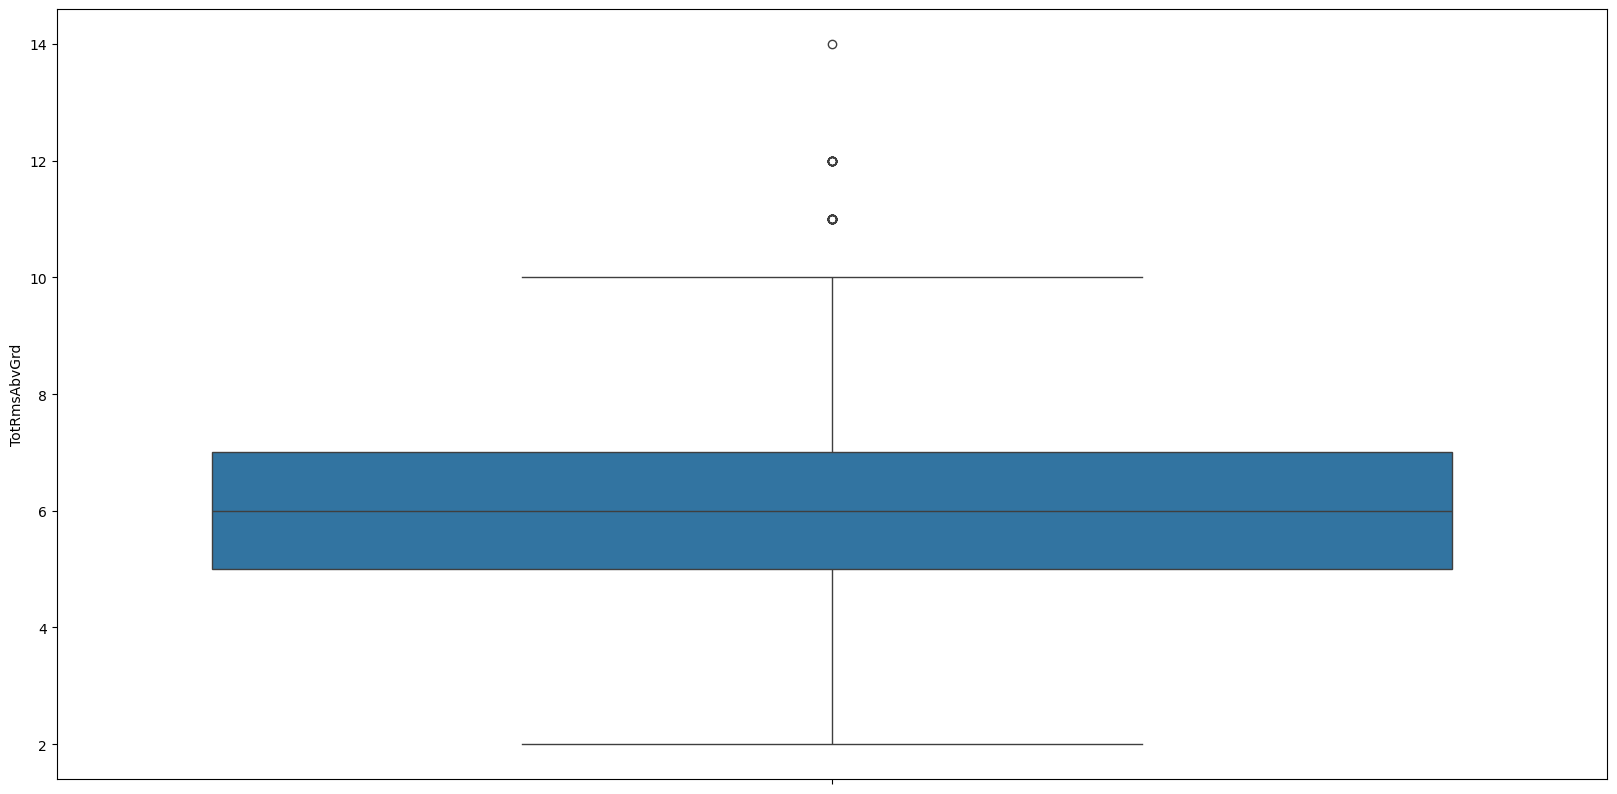

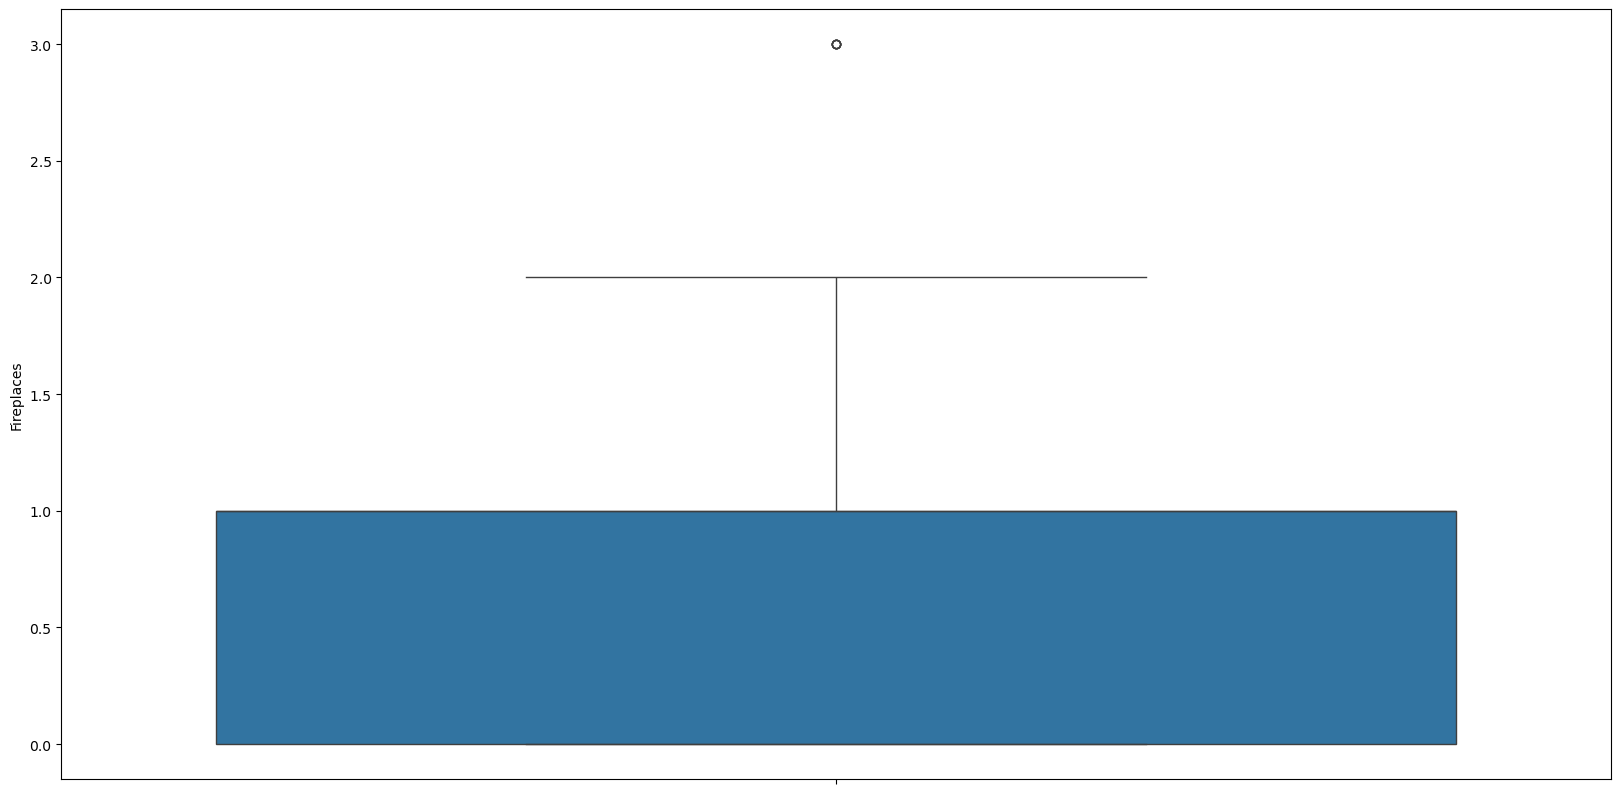

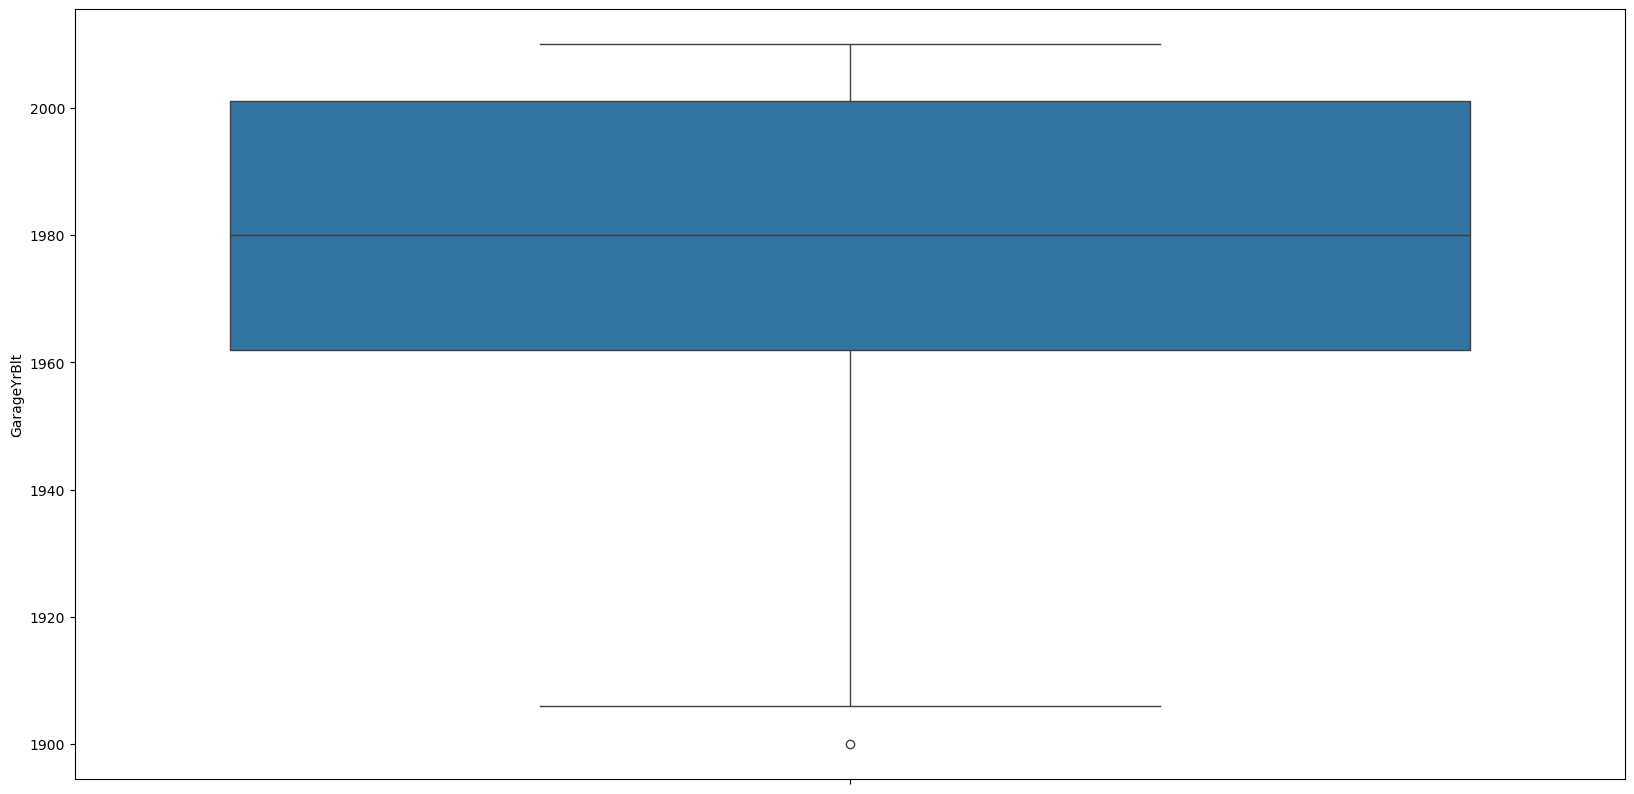

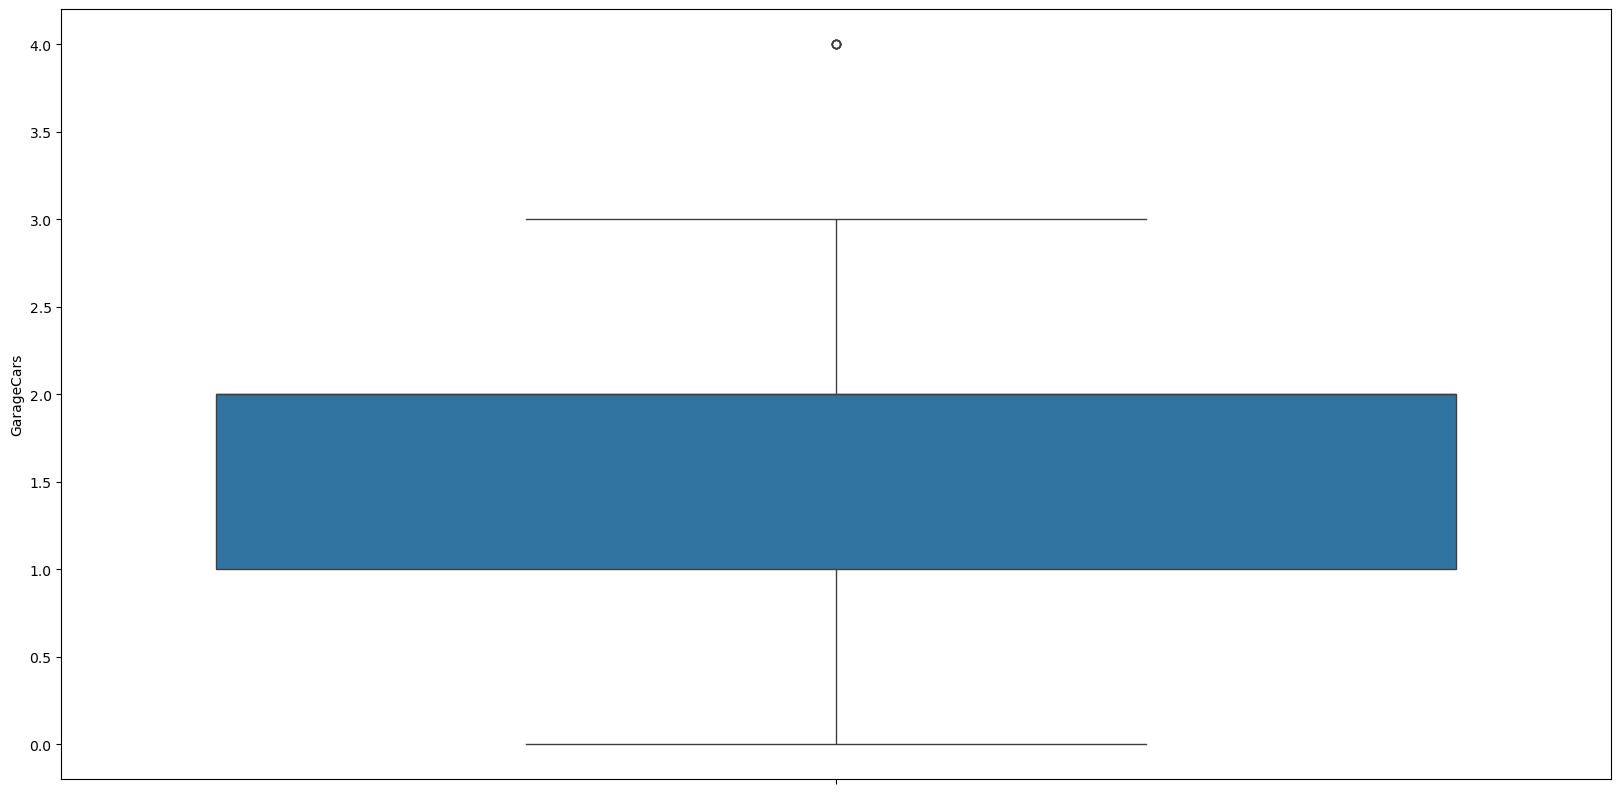

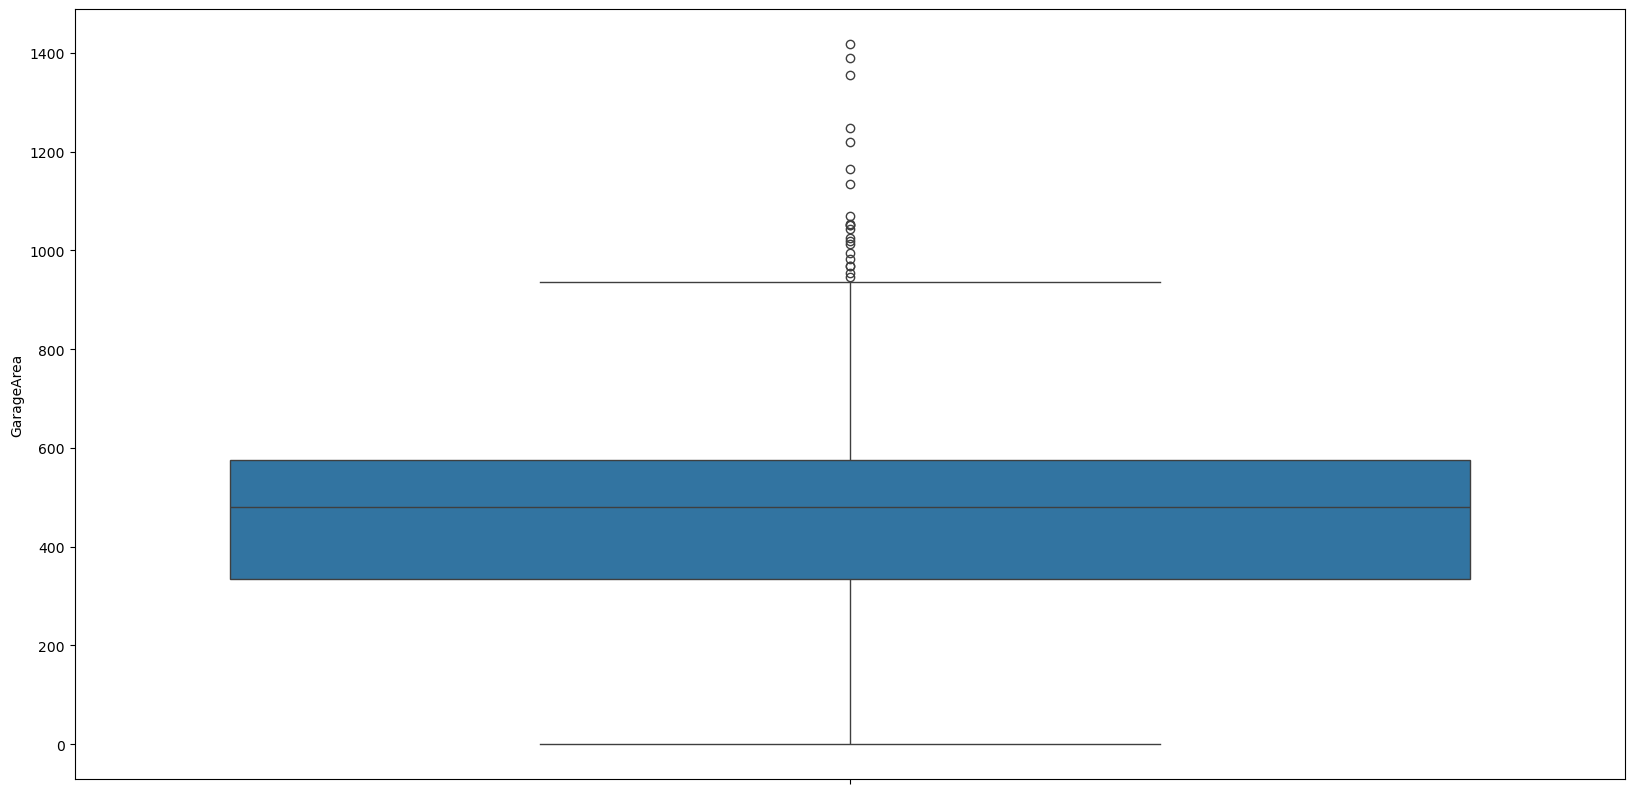

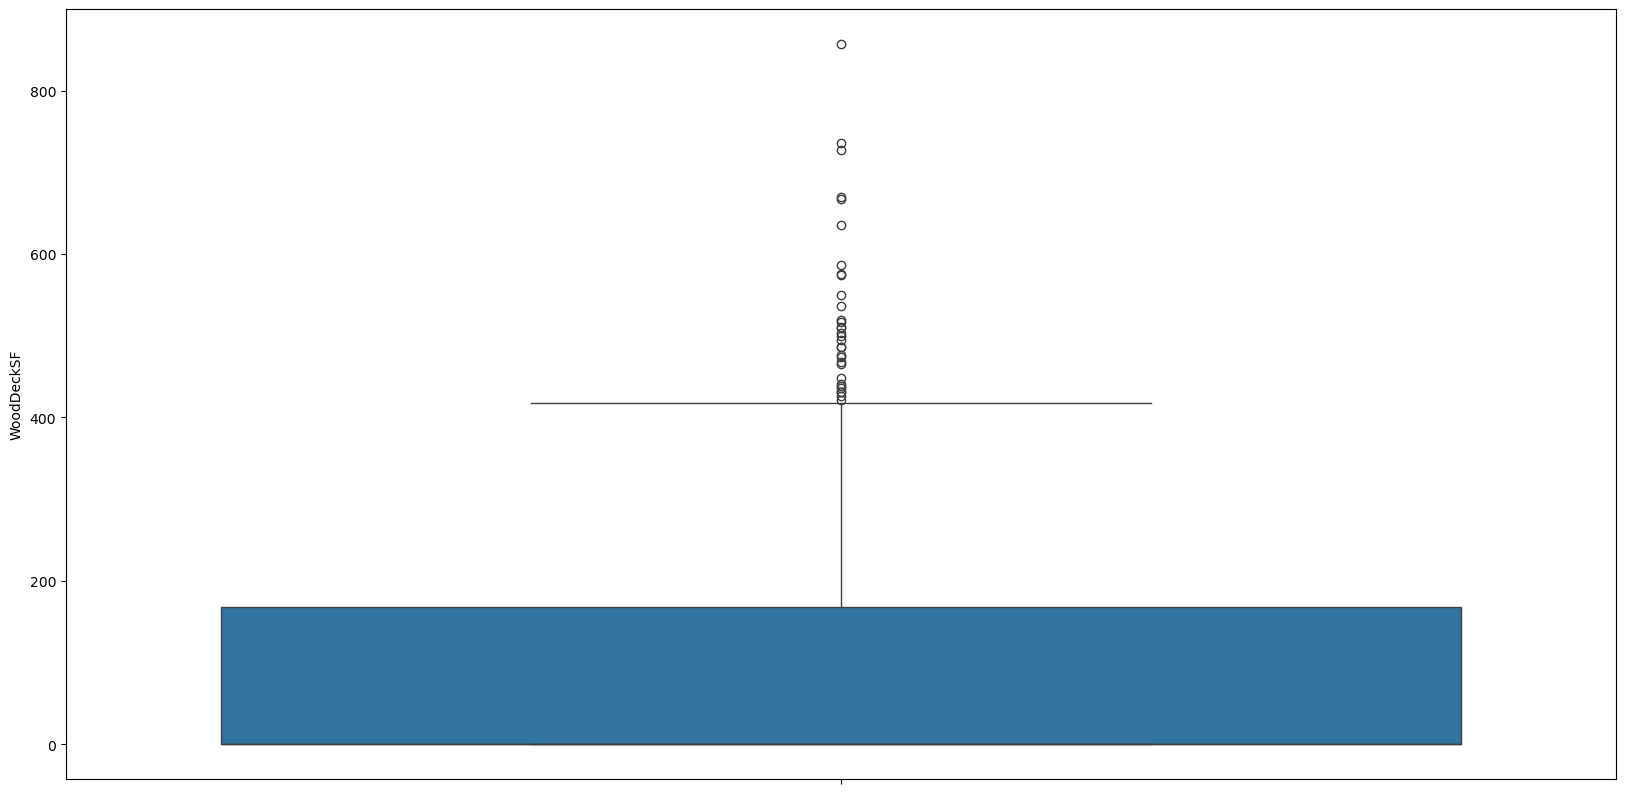

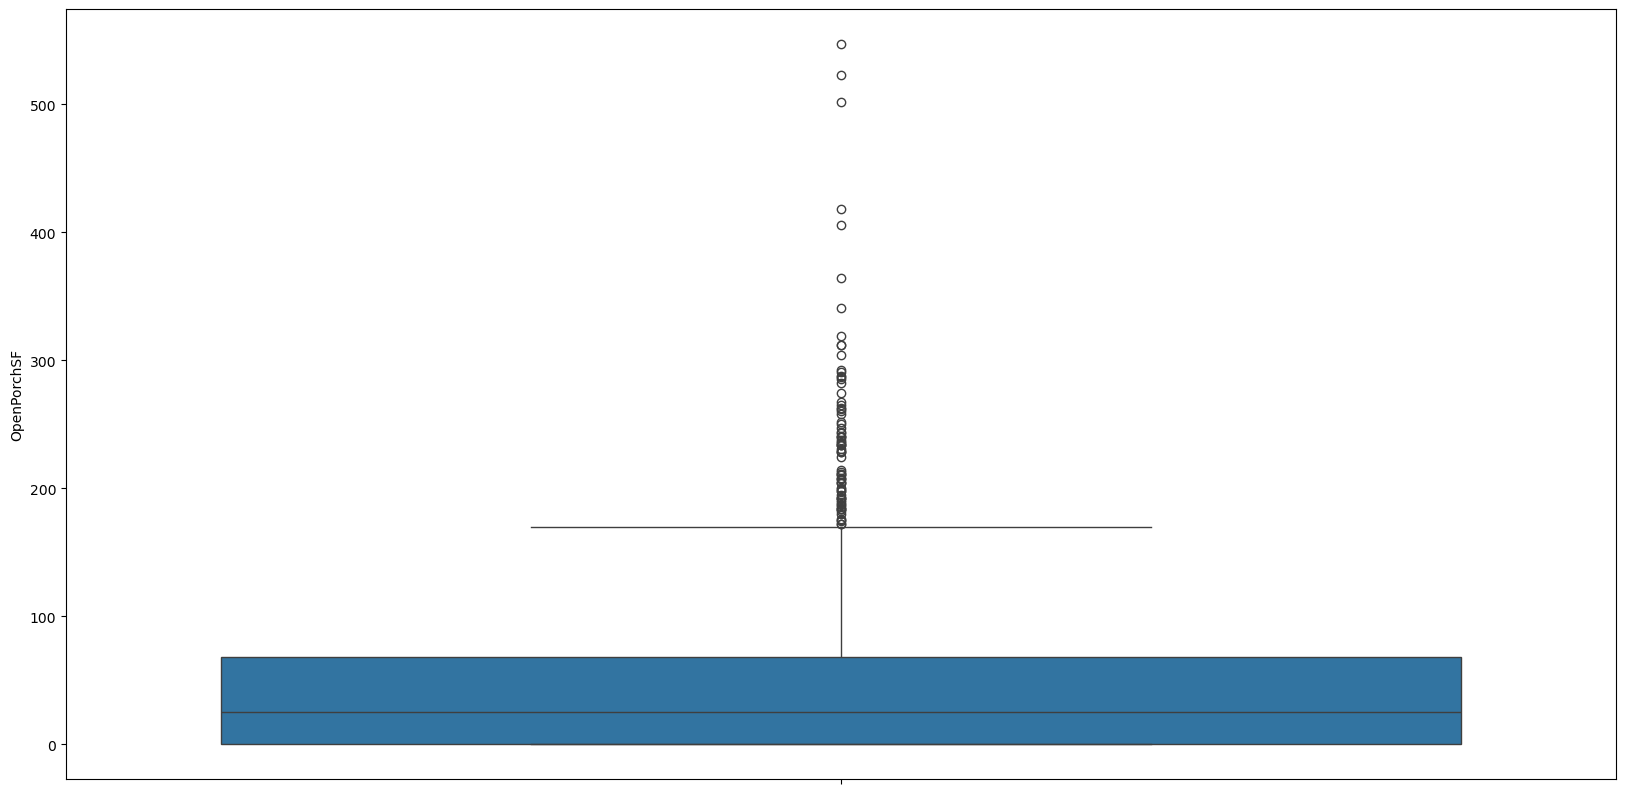

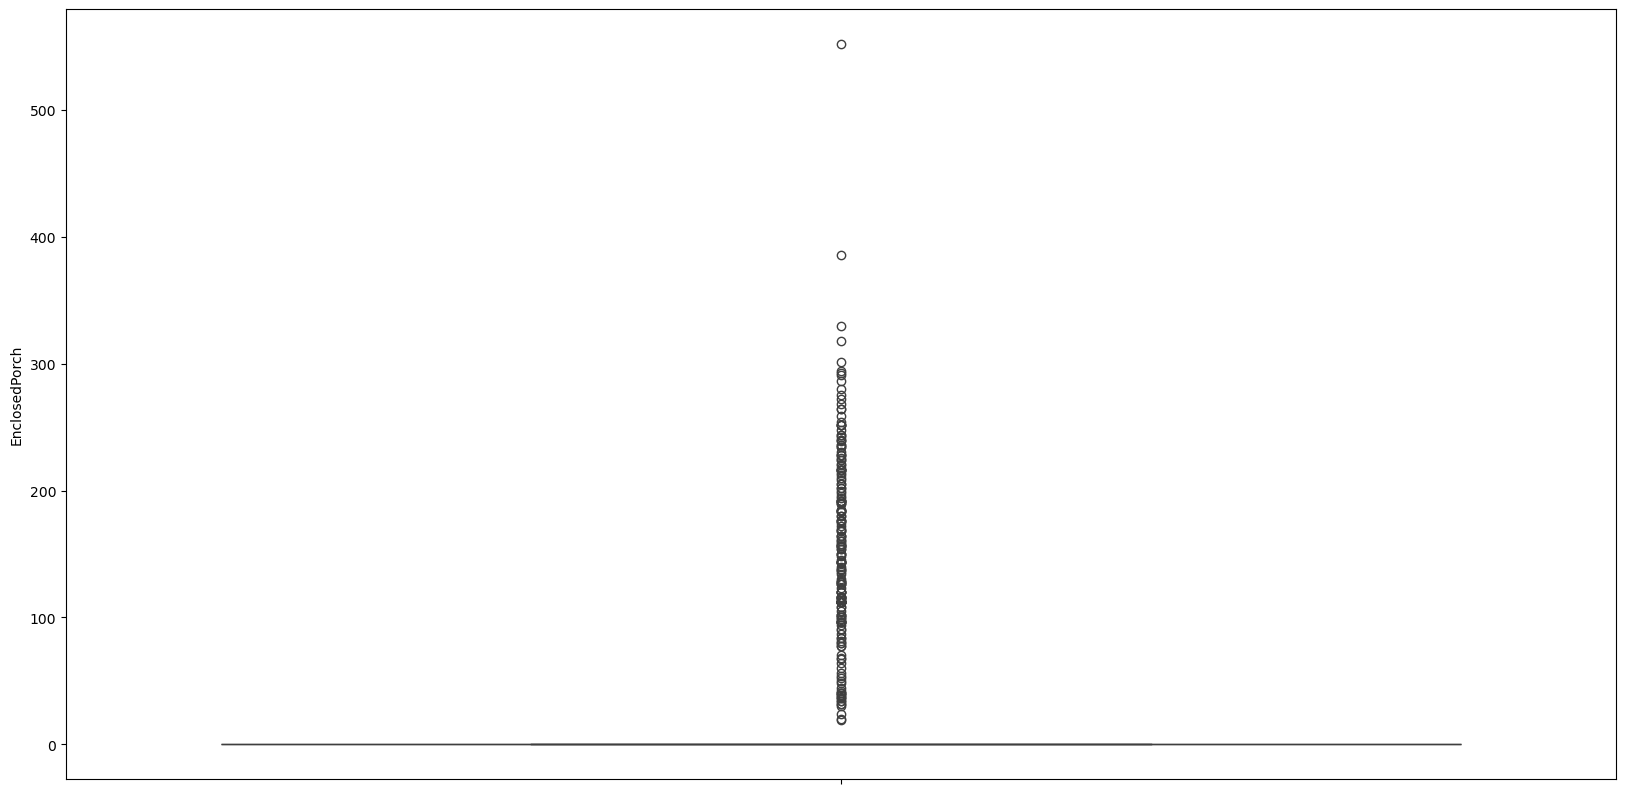

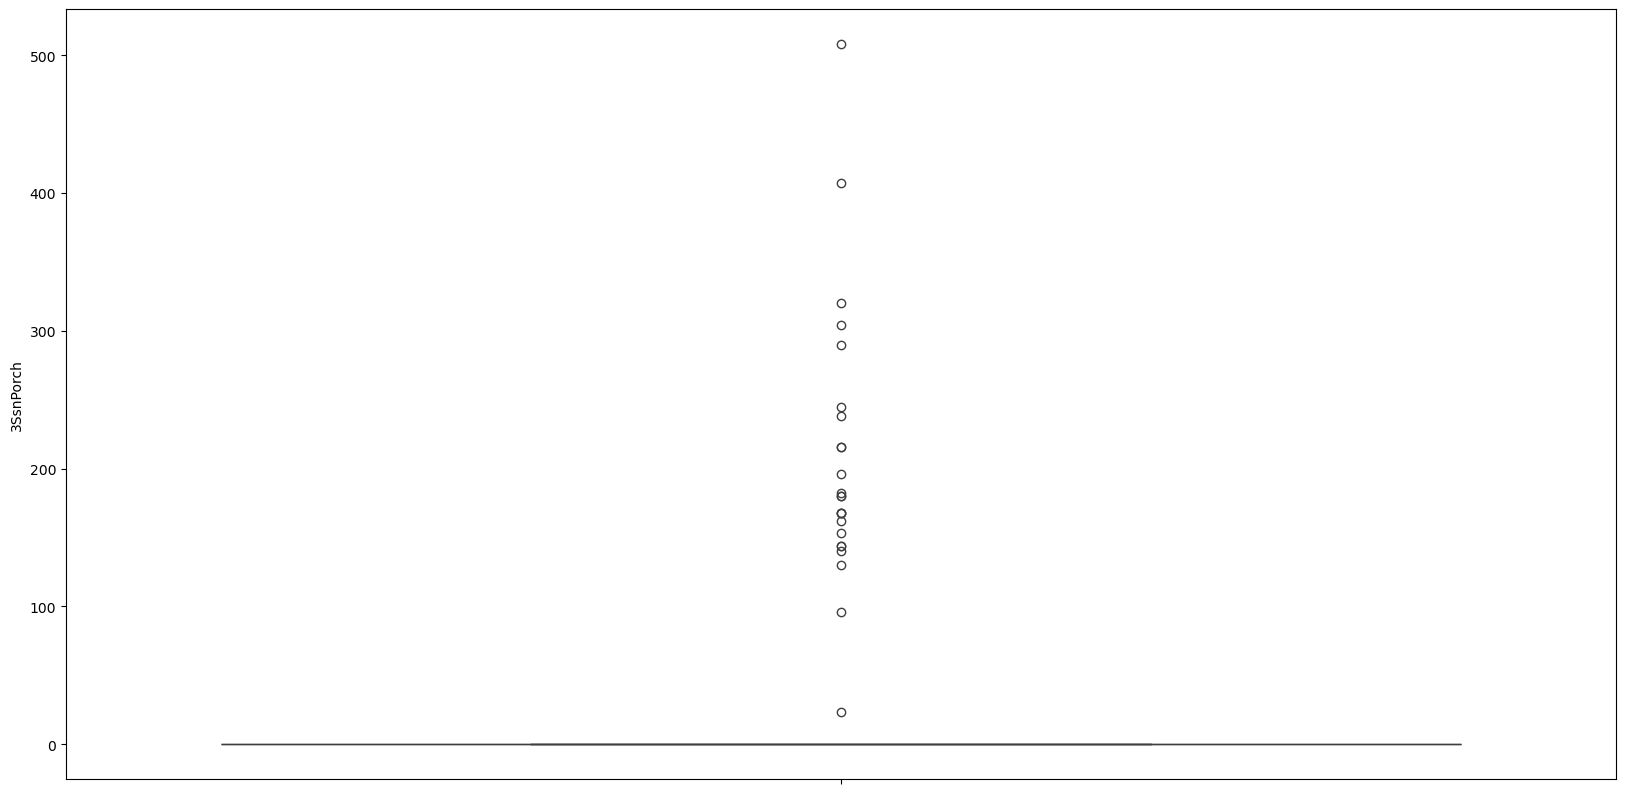

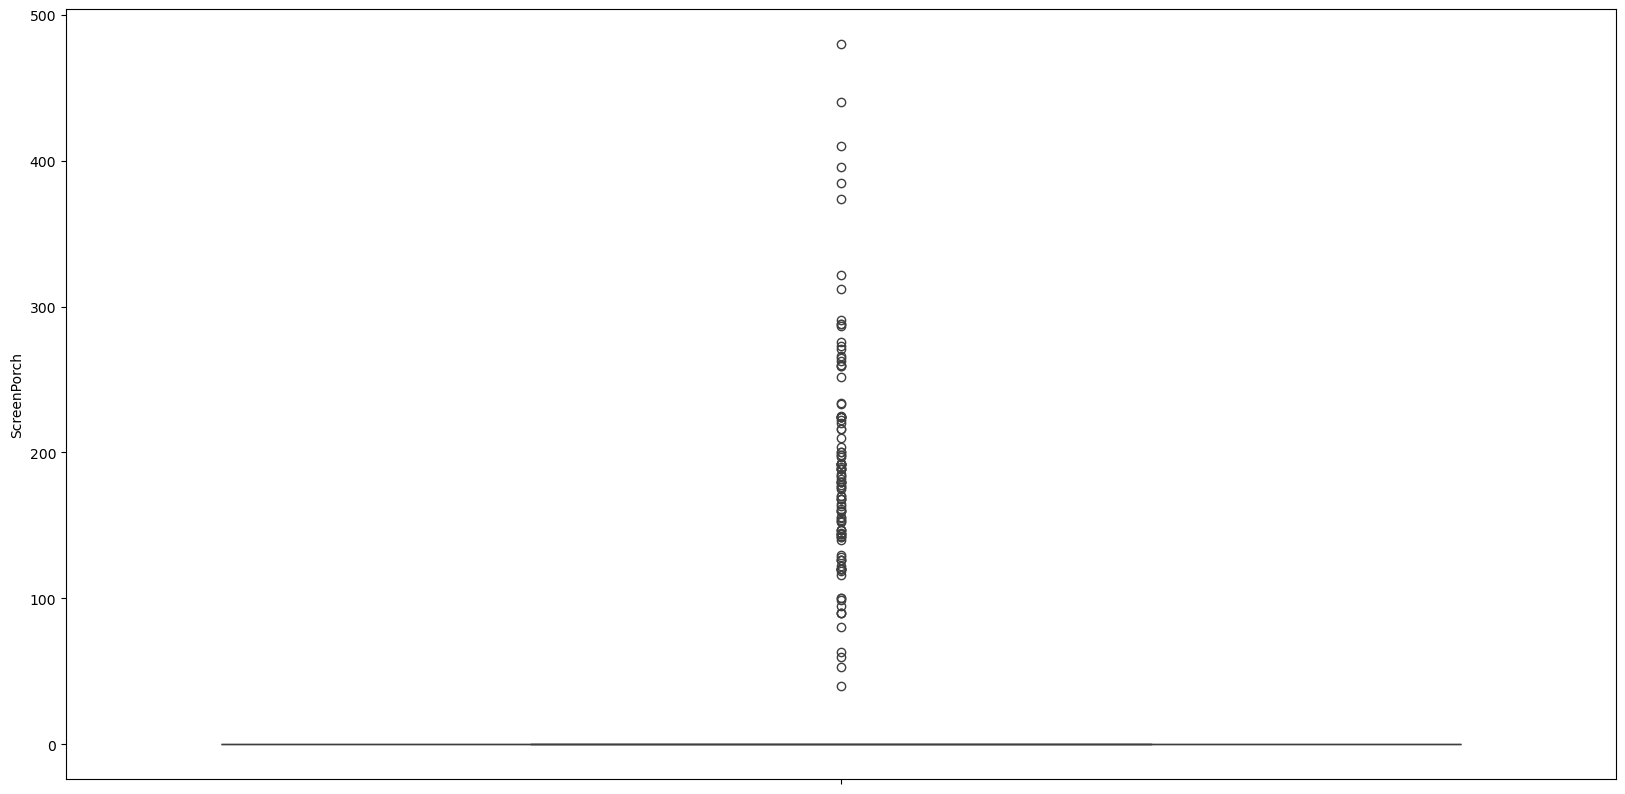

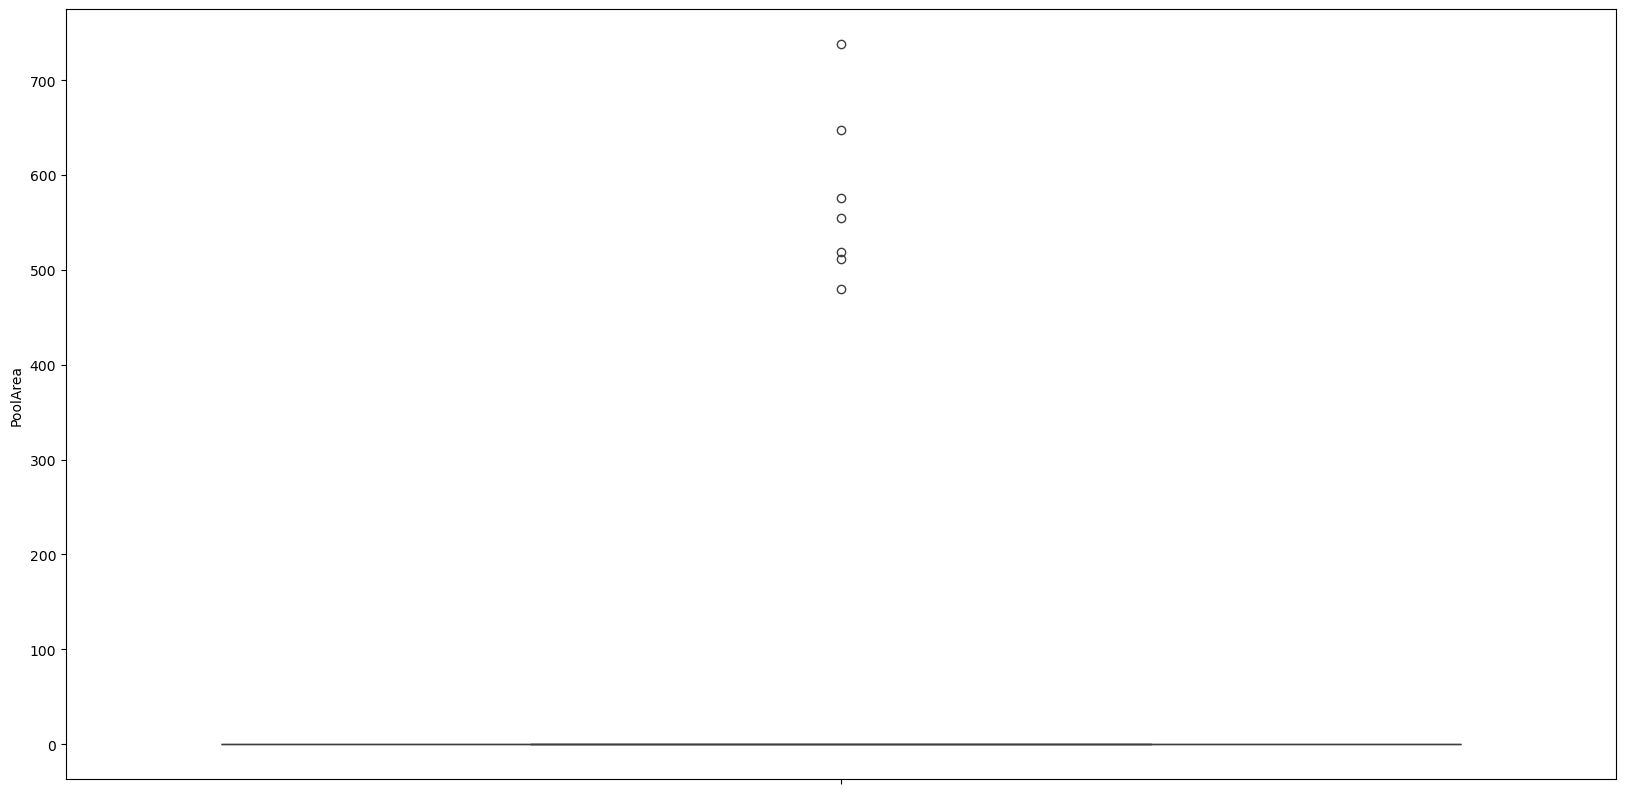

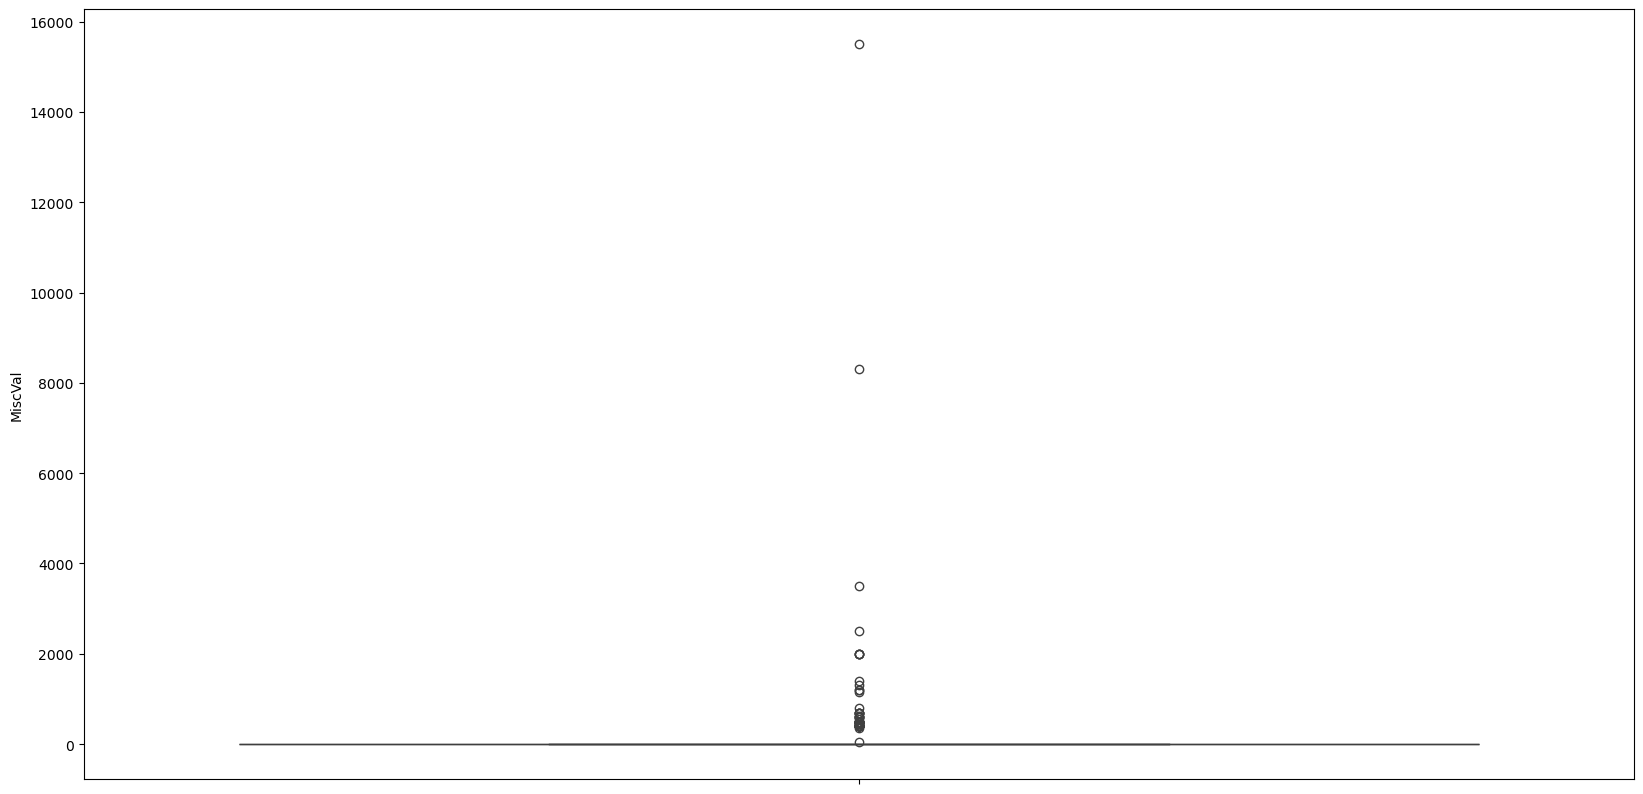

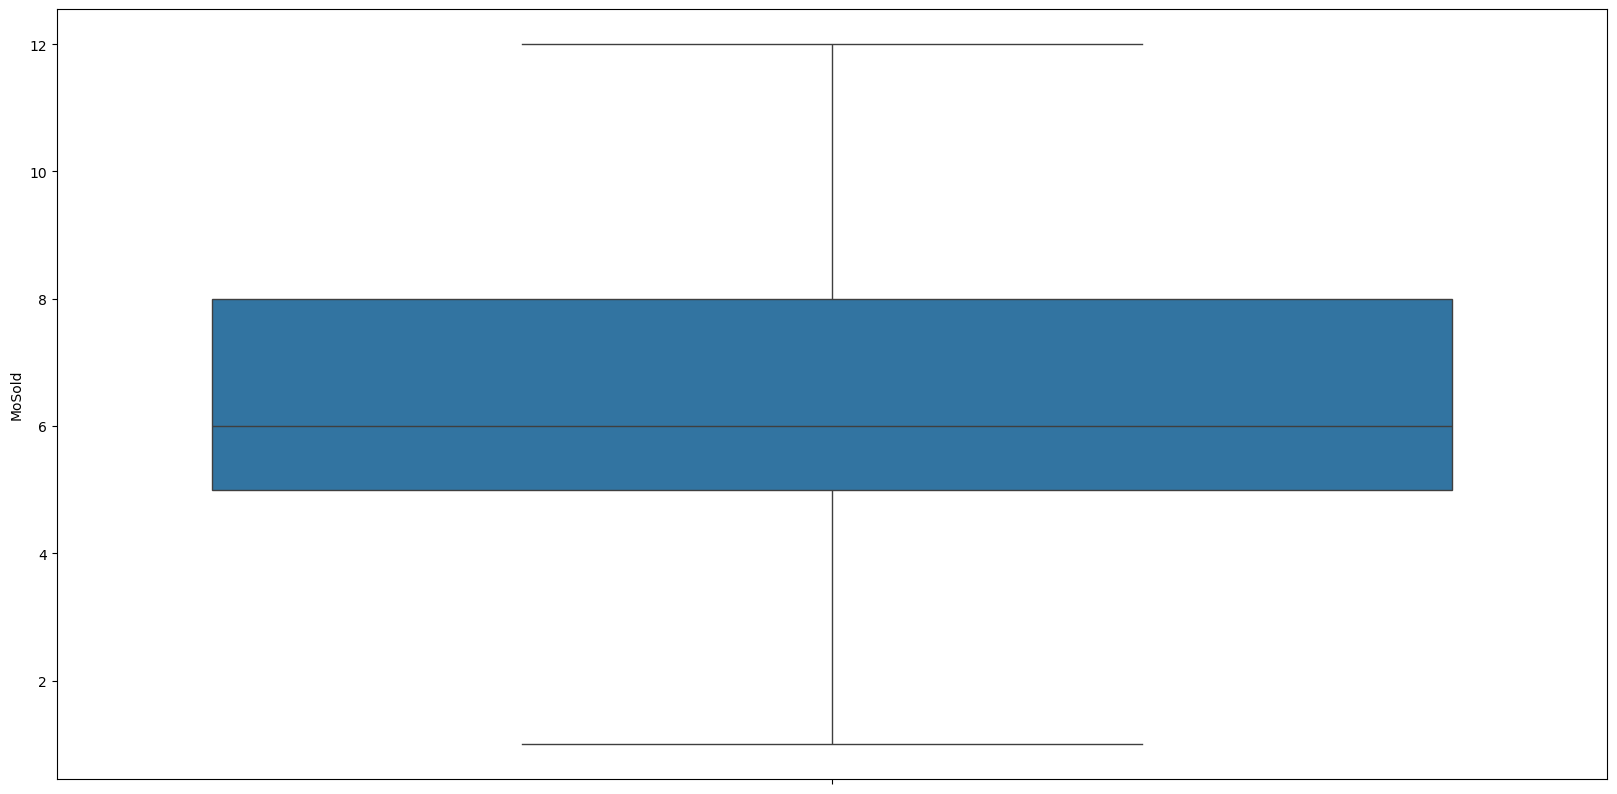

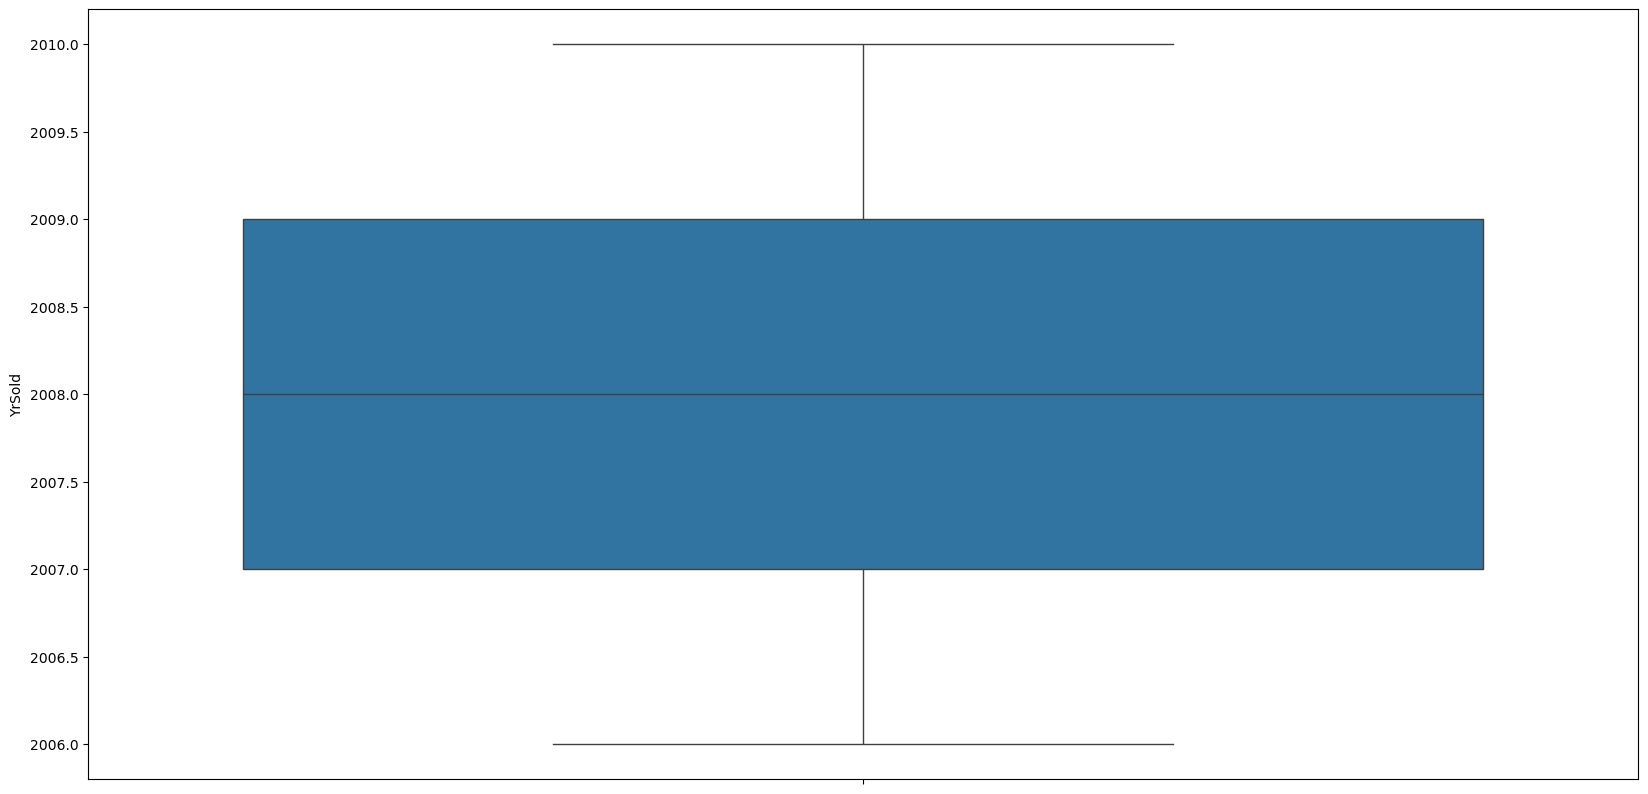

In [32]:
for col in num_cols:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data[col])
    plt.show()


# 범주형은 one-hot encoding, 수치형은 robustscale 처리

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
rs = RobustScaler()
rs.fit(X_train[num_cols])
X_train_num = rs.transform(X_train[num_cols])
X_test_num = rs.transform(X_test[num_cols])
rs_X_train_num = pd.DataFrame(X_train_num, columns=num_cols, index=X_train[num_cols].index)
rs_X_test_num = pd.DataFrame(X_test_num, columns=num_cols, index=X_test[num_cols].index) 

In [39]:
rs_X_train_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
135,-0.6,0.578947,0.193787,0.5,1.0,-0.041667,-0.631579,1.694118,-0.538674,0.0,1.399574,0.619238,1.165754,0.000000,0.0,0.315305,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,-0.256410,0.0,0.203991,0.574780,-0.369863,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0
1452,2.6,-1.789474,-1.435233,-0.5,0.0,0.687500,0.289474,0.470588,0.216851,0.0,-0.824733,-0.897796,-0.048780,0.000000,0.0,-0.620637,1.0,0.0,-1.0,0.0,-1.0,0.0,-0.5,-1.0,0.641026,0.0,0.181818,0.000000,0.013699,0.0,0.0,0.0,0.0,0.0,-0.333333,-1.0
762,0.2,0.157895,-0.232544,0.5,0.0,0.770833,0.394737,0.000000,-0.505525,0.0,0.423881,-0.478958,-0.662021,1.070769,0.0,0.108170,0.0,0.0,0.0,1.0,0.0,0.0,0.5,-1.0,0.743590,0.0,0.576497,0.991202,0.246575,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
932,-0.6,0.789474,0.501423,1.5,0.0,0.708333,0.315789,1.776471,-0.538674,0.0,2.424733,1.823647,1.609756,0.000000,0.0,0.657461,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,1.0,1.348115,0.000000,2.246575,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.5
435,0.2,-1.368421,0.258463,0.5,1.0,0.500000,0.052632,0.000000,-0.006906,344.0,-0.705330,-0.392786,-0.536585,1.140513,0.0,0.283084,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.410256,0.0,0.292683,0.926686,0.465753,0.0,0.0,0.0,0.0,0.0,-0.666667,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.6,0.473684,-0.068552,0.0,0.0,0.708333,0.315789,0.000000,-0.505525,0.0,1.375693,0.639279,0.433051,0.000000,0.0,-0.249329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,-0.195122,0.000000,-0.068493,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.5
1130,0.0,-0.210526,-0.435051,-1.0,-2.0,-0.916667,-1.157895,0.000000,0.320442,0.0,0.028145,0.254509,0.460926,0.892991,0.0,0.774070,1.0,0.0,0.0,0.0,1.0,0.0,0.5,1.0,0.025641,0.0,0.407982,2.527859,0.232877,0.0,0.0,0.0,0.0,0.0,2.000000,0.5
1294,-0.6,-0.473684,-0.345909,-0.5,2.0,-0.354167,-0.105263,0.000000,-0.308011,0.0,0.364179,-0.262525,-0.462917,0.000000,0.0,-0.939778,1.0,0.0,-1.0,0.0,-1.0,0.0,-0.5,-1.0,-0.589744,0.0,0.390244,0.000000,-0.369863,0.0,0.0,0.0,0.0,0.0,-0.666667,-1.0
860,0.0,-0.736842,-0.474293,0.5,3.0,-1.125000,0.105263,0.000000,-0.538674,0.0,0.730917,-0.166333,-0.367347,0.702906,0.0,-0.077484,0.0,0.0,-1.0,1.0,0.0,0.0,0.5,0.0,-1.410256,-1.0,-1.188470,0.000000,2.917808,0.0,0.0,0.0,0.0,0.0,0.000000,-0.5


In [41]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[cat_cols])
X_train_temp = ohe.transform(X_train[cat_cols])
X_test_temp = ohe.transform(X_test[cat_cols])
ohe_X_train_df = pd.DataFrame(X_train_temp, columns=ohe.get_feature_names_out(), index=X_train[cat_cols].index)
ohe_X_test_df = pd.DataFrame(X_test_temp, columns=ohe.get_feature_names_out(), index=X_test[cat_cols].index)

In [42]:
ohe_X_train_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,...,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1452,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
762,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
932,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
435,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [44]:
X_train_df = pd.concat([rs_X_train_num, ohe_X_train_df], axis=1)
X_test_df = pd.concat([rs_X_test_num, ohe_X_test_df], axis=1)

In [45]:
X_train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,-0.6,0.578947,0.193787,0.5,1.0,-0.041667,-0.631579,1.694118,-0.538674,0.0,1.399574,0.619238,1.165754,0.000000,0.0,0.315305,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,-0.256410,0.0,0.203991,0.574780,-0.369863,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1452,2.6,-1.789474,-1.435233,-0.5,0.0,0.687500,0.289474,0.470588,0.216851,0.0,-0.824733,-0.897796,-0.048780,0.000000,0.0,-0.620637,1.0,0.0,-1.0,0.0,-1.0,0.0,-0.5,-1.0,0.641026,0.0,0.181818,0.000000,0.013699,0.0,0.0,0.0,0.0,0.0,-0.333333,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
762,0.2,0.157895,-0.232544,0.5,0.0,0.770833,0.394737,0.000000,-0.505525,0.0,0.423881,-0.478958,-0.662021,1.070769,0.0,0.108170,0.0,0.0,0.0,1.0,0.0,0.0,0.5,-1.0,0.743590,0.0,0.576497,0.991202,0.246575,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
932,-0.6,0.789474,0.501423,1.5,0.0,0.708333,0.315789,1.776471,-0.538674,0.0,2.424733,1.823647,1.609756,0.000000,0.0,0.657461,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,1.0,1.348115,0.000000,2.246575,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
435,0.2,-1.368421,0.258463,0.5,1.0,0.500000,0.052632,0.000000,-0.006906,344.0,-0.705330,-0.392786,-0.536585,1.140513,0.0,0.283084,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.410256,0.0,0.292683,0.926686,0.465753,0.0,0.0,0.0,0.0,0.0,-0.666667,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [46]:
X_test_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,-0.6,0.052632,-0.287289,0.0,3.0,-0.187500,0.236842,0.000000,0.377072,0.0,-0.149254,0.128257,-0.056745,0.000000,0.0,-0.626774,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-0.435897,-1.0,-0.975610,1.126100,-0.369863,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1105,0.2,1.526316,0.643372,1.0,0.0,0.458333,0.026316,2.129412,0.886740,0.0,-0.089552,0.937876,0.803385,1.534359,0.0,1.757576,1.0,0.0,0.0,1.0,0.0,0.0,1.5,1.0,0.358974,0.0,1.011086,1.090909,0.068493,0.0,0.0,0.0,0.0,0.0,-0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
413,-0.4,-0.684211,-0.155029,-0.5,1.0,-0.937500,-1.157895,0.000000,-0.538674,0.0,0.894670,0.026052,-0.136386,0.000000,0.0,-0.688147,0.0,0.0,-1.0,0.0,-1.0,0.0,-0.5,0.0,-1.358974,0.0,-0.549889,0.000000,-0.369863,130.0,0.0,0.0,0.0,0.0,-1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
522,0.0,-1.000000,-1.114274,0.0,2.0,-0.520833,-1.157895,0.000000,0.012431,0.0,0.207249,0.018036,-0.184171,0.902564,0.0,0.287687,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,-0.769231,0.0,-0.283814,0.000000,-0.041096,36.0,0.0,0.0,0.0,0.0,1.333333,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1036,-0.6,1.052632,0.798886,1.5,0.0,0.729167,0.368421,0.411765,0.872928,0.0,0.195309,1.252505,1.042310,0.000000,0.0,0.220176,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.717949,1.0,1.898004,1.337243,-0.369863,0.0,0.0,0.0,0.0,0.0,1.000000,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# 텐서플로우로 연속데이터 (집값) 분석하기
* 출력층 Dense(1)
* model.compile(loss='mean_squared_error', metrics='mse')
* dropout: 과적합을 방지하기 위해서 일부러 일부 노드의 가중치 계산을 건너뜀

In [48]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.metrics import RootMeanSquaredError

In [49]:
inputs = Input(shape=(X_train_df.shape[1], ))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(8, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

I0000 00:00:1764737103.524149  119515 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1316 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 261)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         8,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,057 (35.38 KB)

 Trainable params: 9,057 (35.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000


2025-12-03 13:50:52.558921: I external/local_xla/xla/service/service.cc:163] XLA service 0x7fd7fc01d0e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-03 13:50:52.558965: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-12-03 13:50:52.598468: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-03 13:50:52.753956: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
2025-12-03 13:50:53.413467: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_154', 12 bytes spill stores, 12 bytes spill loads

2025-12-03 13:50:53.772865: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:3

17/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39772010616.4706 - mse: 39772010616.4706 

I0000 00:00:1764737454.972955  119635 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-12-03 13:50:55.984010: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_154', 108 bytes spill stores, 108 bytes spill loads



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 39393427712.0000 - mse: 39393427712.0000

2025-12-03 13:50:58.062473: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 80 bytes spill stores, 80 bytes spill loads



32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 38886891520.0000 - mse: 38886891520.0000 - val_loss: 39369109504.0000 - val_mse: 39369109504.0000
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 38873587712.0000 - mse: 38873587712.0000 - val_loss: 39345549312.0000 - val_mse: 39345549312.0000
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38835642368.0000 - mse: 38835642368.0000 - val_loss: 39278837760.0000 - val_mse: 39278837760.0000
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38734794752.0000 - mse: 38734794752.0000 - val_loss: 39111094272.0000 - val_mse: 39111094272.0000
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ -2s -55390us/step - loss: 38485757952.0000 - mse: 38485757952.0000 - val_loss: 38731042816.0000 - val_mse: 38731042816.0000
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37953409024.0000 - mse: 37953409024.0000 - val_loss: 38009323520.0000 - val_mse: 38009323520.0000
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - los

Epoch 44/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3874233088.0000 - mse: 3874233088.0000 - val_loss: 2761763840.0000 - val_mse: 2761763840.0000
Epoch 45/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3326734080.0000 - mse: 3326734080.0000 - val_loss: 2607064320.0000 - val_mse: 2607064320.0000
Epoch 46/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3725830912.0000 - mse: 3725830912.0000 - val_loss: 2601505024.0000 - val_mse: 2601505024.0000
Epoch 47/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3469180928.0000 - mse: 3469180928.0000 - val_loss: 2442870016.0000 - val_mse: 2442870016.0000
Epoch 48/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3697329152.0000 - mse: 3697329152.0000 - val_loss: 2403298304.0000 - val_mse: 2403298304.0000
Epoch 49/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3535576064.0000 - mse: 3535576064.0000 - val_loss: 2292695040.0000 - val_mse: 2292695040.0000
Epoch 50/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 389305523

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2876354816.0000 - mse: 2876354816.0000 - val_loss: 1413726720.0000 - val_mse: 1413726720.0000
Epoch 88/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2852580352.0000 - mse: 2852580352.0000 - val_loss: 1398245120.0000 - val_mse: 1398245120.0000
Epoch 89/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2838780928.0000 - mse: 2838780928.0000 - val_loss: 1448509184.0000 - val_mse: 1448509184.0000
Epoch 90/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3146109184.0000 - mse: 3146109184.0000 - val_loss: 1422030464.0000 - val_mse: 1422030464.0000
Epoch 91/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2945303808.0000 - mse: 2945303808.0000 - val_loss: 1367916288.0000 - val_mse: 1367916288.0000
Epoch 92/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2855417856.0000 - mse: 2855417856.0000 - val_loss: 1377192064.0000 - val_mse: 1377192064.0000
Epoch 93/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2737656832.0000 - mse:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2535686400.0000 - mse: 2535686400.0000 - val_loss: 1176898560.0000 - val_mse: 1176898560.0000
Epoch 131/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2464346368.0000 - mse: 2464346368.0000 - val_loss: 1164422144.0000 - val_mse: 1164422144.0000
Epoch 132/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2672799488.0000 - mse: 2672799488.0000 - val_loss: 1249786624.0000 - val_mse: 1249786624.0000
Epoch 133/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2764935936.0000 - mse: 2764935936.0000 - val_loss: 1231324544.0000 - val_mse: 1231324544.0000
Epoch 134/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2962001664.0000 - mse: 2962001664.0000 - val_loss: 1225447296.0000 - val_mse: 1225447296.0000
Epoch 135/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2746582272.0000 - mse: 2746582272.0000 - val_loss: 1186707456.0000 - val_mse: 1186707456.0000
Epoch 136/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2796459264.0000 -

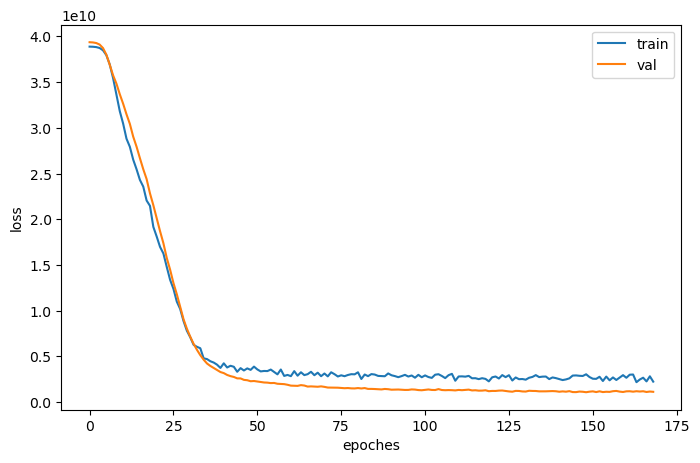

In [50]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_path = "./model/iowa_model_best.keras"
chech_point = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True)
history = model.fit(X_train_df, y_train, epochs=1000, batch_size=32, validation_data=(X_test_df, y_test),
                    callbacks=[early_stop, chech_point])
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 불러와서 예측

In [51]:
from keras.models import load_model

In [62]:
best_model = load_model("./model/iowa_model_best.keras")
pred = best_model.predict(X_test_df)
pred = pd.DataFrame(pred, columns=['pred'])
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


,pred
0,142537.828125
1,290985.562500
2,92726.781250
3,147880.906250
4,291050.218750
...,...
433,124676.765625
434,124188.601562
435,198166.953125
436,124729.398438


In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
print('mse: ',  mean_squared_error(y_test, pred))
print('rmse: ',  np.sqrt(mean_squared_error(y_test, pred)))

mse:  1091689663.0952291
rmse:  33040.727339076984


In [65]:
real_price = y_test.reset_index(drop=True)
real_price

0      154500
1      325000
2      115000
3      159000
4      315500
        ...  
433    139000
434    126175
435    205950
436    110000
437    485000
Name: SalePrice, Length: 438, dtype: int64

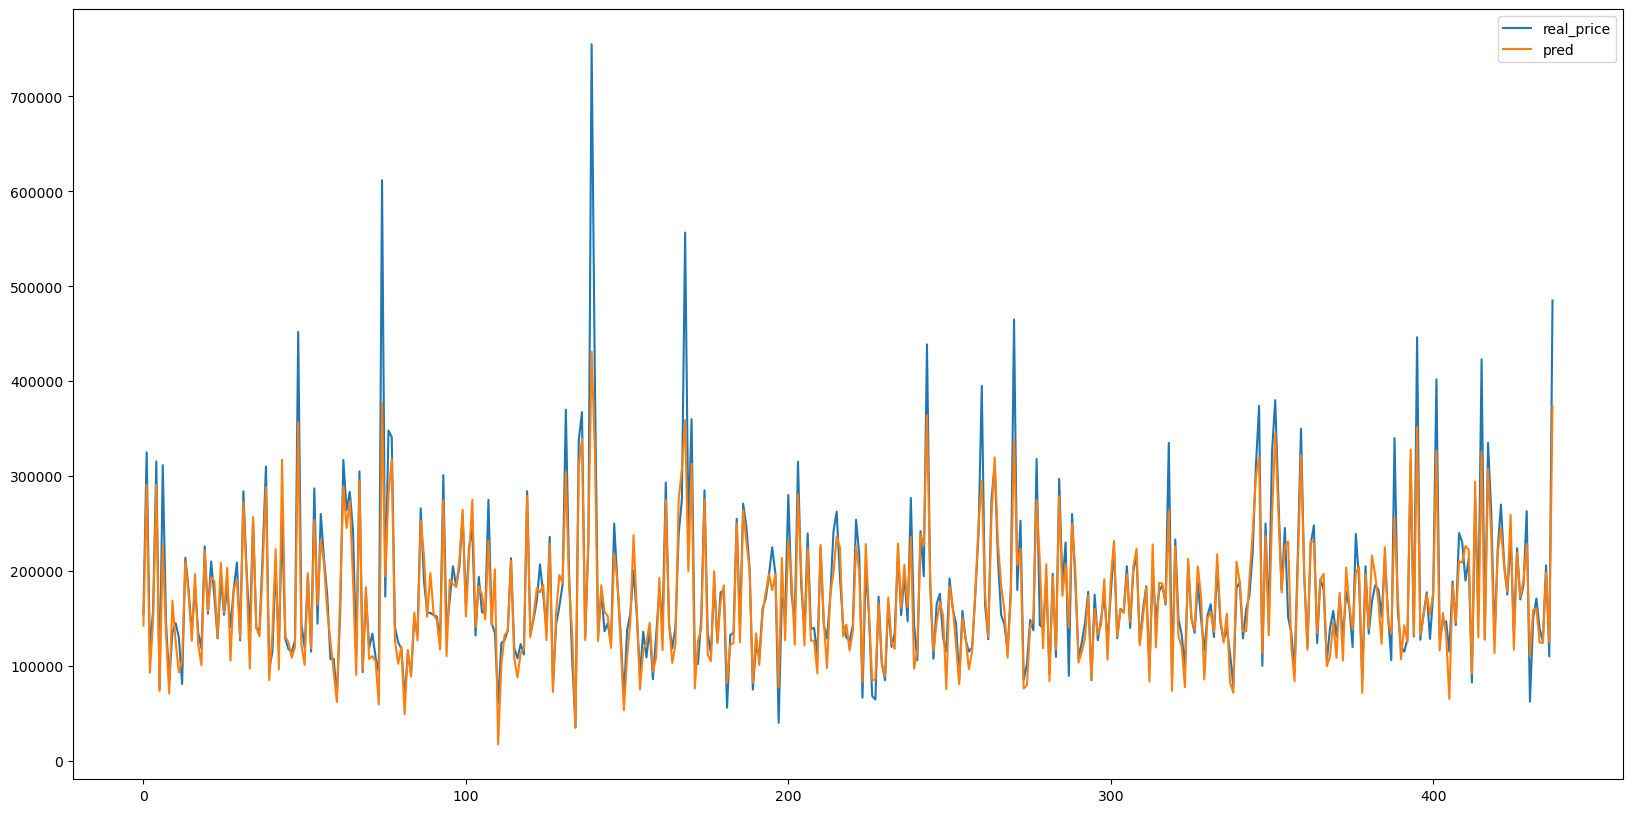

In [66]:
plt.figure(figsize=(20, 10))
plt.plot(real_price, label="real_price")
plt.plot(pred, label="pred")
plt.legend()
plt.show()